<div style="text-align: right" align="right"><i>Peter Norvig<br>December 1–25, 2021</i></div>

# Advent of Code 2021

I'm doing [Advent of Code](https://adventofcode.com/2021) (AoC) this year. I'm not competing for points, just participating for fun.

To fully understand each puzzle's instructions, click on the link (e.g. [**Day 1**](https://adventofcode.com/2021/day/1)); I give only brief summaries here. 

Part of the idea of AoC is that you have to make some design choices to solve Part 1 *before* you get to see the instructions for Part 2. So there is a tension of wanting the solution to Part 1 to provide components that can be re-used in Part 2, without falling victim to [YAGNI](https://en.wikipedia.org/wiki/You_aren%27t_gonna_need_it). In this notebook I won't refactor the code for Part 1 after I see what is requested in Part 2 (although I may edit the code for clarity, without changing the initial approach). Sometimes I will explore further, inventing my own "Part 3".

This year's AoC theme involves Santa's Elves on a submarine. Gary J. Grady ([@GaryJGrady](https://twitter.com/GaryJGrady/) on Twitter) has some nice drawings to set the scene:

<img src="https://pbs.twimg.com/media/FFiywKpWYAAm6B5?format=jpg&name=medium" width=400>

# Day 0: Preparations

I put some imports and functions that I thought would be useful in a notebook of utility functions, [AdventUtils.ipynb](AdventUtils.ipynb).

In [81]:
%run AdventUtils.ipynb

current_year = 2021

# [Day 1](https://adventofcode.com/2021/day/1): Sonar Sweep


- **Input**: Each item in the input is an integer depth measurement.


In [2]:
in1 = parse(1, int)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 2000 lines:
────────────────────────────────────────────────────────────────────────────────────────────────────
148
167
168
169
182
188
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 2000 ints:
────────────────────────────────────────────────────────────────────────────────────────────────────
148
167
168
169
182
188
...


- **Part 1**: **How many measurements are larger than the previous measurement?**

In [3]:
def increases(measurements: Sequence[int]) -> int:
    """How many measurements are larger than the previous measurement?"""
    return quantify(measurements[i] > measurements[i - 1] 
                    for i in range(1, len(measurements)))

answer(1.1, 1400, lambda: increases(in1))

0.000 seconds for correct answer: 1,400


- **Part 2**: Consider sums of a three-measurement sliding window. **How many sums are larger than the previous sum?**

In [4]:
def windows(sequence, width) -> List[Sequence]:
    """All sliding (overlapping) windows of given `width` in sequence."""
    return [sequence[i:i+width] 
            for i in range(len(sequence) + 1 - width)]

answer(1.2, 1429, lambda: increases(mapt(sum, windows(in1, 3))))

0.001 seconds for correct answer: 1,429


- **Part 3**: Visualization

Let's take a look at where the depths are taking us:

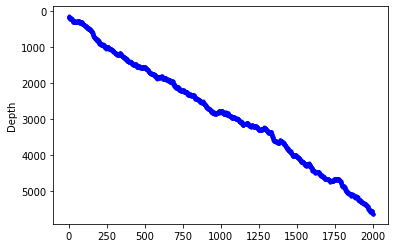

In [5]:
plt.plot(in1, 'b.'); plt.ylabel('Depth'); plt.gca().invert_yaxis();

It looks like Gary Grady was right; the submarine is descending at a steep angle.

# [Day 2](https://adventofcode.com/2021/day/2): Dive! 

- **Input**: Each item in the input is a command name ("forward", "down", or "up") followed by an integer.

I'll parse a command into a tuple like `('forward', 2)`.

In [6]:
in2 = parse(2, atoms)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1000 lines:
────────────────────────────────────────────────────────────────────────────────────────────────────
forward 2
down 7
down 8
forward 9
down 8
forward 9
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 1000 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
('forward', 2)
('down', 7)
('down', 8)
('forward', 9)
('down', 8)
('forward', 9)
...


- **Part 1**: Calculate the horizontal position and depth you would have after following the planned course. **What do you get if you multiply your final horizontal position by your final depth?**

In [7]:
def drive(commands) -> int:
    """What is the product of position and depth after following commands?"""
    pos = depth = 0
    for (op, n) in commands:
        if op == 'forward': pos += n
        if op == 'down':    depth += n
        if op == 'up':      depth -= n
    return pos * depth

answer(2.1, 1_670_340, lambda: drive(in2))

0.000 seconds for correct answer: 1,670,340


- **Part 2**: Using the new interpretation of the commands, calculate the horizontal position and depth you would have after following the planned course. **What do you get if you multiply your final horizontal position by your final depth?**

The *new interpretation* is that the "down" and "up" commands no longer change depth, rather they change *aim*, and going forward *n* units both increments position by *n* and depth by *aim* × *n*.

In [8]:
def drive2(commands) -> int:
    """What is the product of position and depth after following commands?
    This time we have to keep track of `aim` as well."""
    pos = depth = aim = 0
    for (op, n) in commands:
        if op == 'forward': pos += n; depth += aim * n
        if op == 'down':    aim += n
        if op == 'up':      aim -= n
    return pos * depth

answer(2.2, 1_954_293_920, lambda: drive2(in2))

0.000 seconds for correct answer: 1,954,293,920


# [Day 3](https://adventofcode.com/2021/day/3): Binary Diagnostic

- **Input**: Each item in the input is a bit string of `0`s and `1`s.

I'll parse them as strings; I won't convert them into ints.

In [9]:
in3 = parse(3)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1000 lines:
────────────────────────────────────────────────────────────────────────────────────────────────────
101000111100
000011111101
011100000100
100100010000
011110010100
101001100000
...


- **Part 1**: Use the binary numbers in your diagnostic report to calculate the gamma rate and epsilon rate, then multiply them together. **What is the power consumption of the submarine?**

In [10]:
def common(strs, i) -> Char: # '1' or '0'
    """The bit that is most common in position i among strs."""
    bits = [s[i] for s in strs]
    return '1' if bits.count('1') >= bits.count('0') else '0'

def uncommon(strs, i) -> Char: # '1' or '0'
    """The bit that is least common in position i among strs."""
    return '1' if common(strs, i) == '0' else '0'

def epsilon(strs) -> str:
    """The bit string formed from most common bit at each position."""
    return cat(common(strs, i) for i in range(len(strs[0])))

def gamma(strs) -> str:
    """The bit string formed from most uncommon bit at each position."""
    return cat(uncommon(strs, i) for i in range(len(strs[0])))

def power(strs) -> int: 
    """Product of epsilon and gamma rates."""
    return int(epsilon(strs), 2) * int(gamma(strs), 2)
    
answer(3.1, 2261546, lambda: power(in3))

0.001 seconds for correct answer: 2,261,546


- **Part 2**: Use the binary numbers in your diagnostic report to calculate the oxygen generator rating and CO2 scrubber rating, then multiply them together. **What is the life support rating of the submarine?**

This time I'll have a single function, `select_str` which selects the str that survives the process of picking strs with the most common or uncommon bit at each position. Then I call `select_str` with `common` to get the oxygen rating and `uncommon` to get the CO2 rating.

In [11]:
def select_str(strs, common_fn, i=0) -> str:
    """Select a str from strs according to common_fn:
    Going left-to-right, repeatedly select just the strs that have the right i-th bit.
    When only one string is remains, return it."""
    if len(strs) == 1:
        return strs[0]
    else:
        bit = common_fn(strs, i)
        selected = [s for s in strs if s[i] == bit]
        return select_str(selected, common_fn, i + 1)

def life_support(strs) -> int: 
    """The product of oxygen (most common select) and CO2 (least common select) rates."""
    return int(select_str(strs, common), 2) * int(select_str(strs, uncommon), 2)
    
answer(3.2, 6775520, lambda: life_support(in3))

0.000 seconds for correct answer: 6,775,520


# [Day 4](https://adventofcode.com/2021/day/4): Giant Squid

- **Input**: The first item of the input is a permutation of the integers 0-99. Subsequent items are bingo boards: 5 lines of 5 ints each. items are separated by *two* newlines. 

I'll represent a board as a tuple of 25 ints; that makes `parse` easy: the permutation of integers and the bingo boards can both be parsed by `ints`. (Bingo games will be played against a giant squid; we get to choose which board we want to play.)

In [12]:
order, *boards = in4 = parse(4, ints, sep='\n\n')

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 601 lines:
────────────────────────────────────────────────────────────────────────────────────────────────────
73,42,95,35,13,40,99,92,33,30,83,1,36,93,59,90,55,25,77,44,37,62,41,47,80,23,51,61,21,20,76,8,71 ...

91  5 64 81 34
15 99 31 63 65
45 39 54 93 83
51 14 23 86 32
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 101 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
(73, 42, 95, 35, 13, 40, 99, 92, 33, 30, 83, 1, 36, 93, 59, 90, 55, 25, 77, 44, 37, 62, 41, 47,  ...
(91, 5, 64, 81, 34, 15, 99, 31, 63, 65, 45, 39, 54, 93, 83, 51, 14, 23, 86, 32, 19, 22, 16, 13, 3)
(20, 83, 38, 85, 70, 69, 12, 14, 26, 84, 19, 76, 45, 78, 99, 22, 80, 90, 33, 46, 75, 31, 21, 6, 28)
(22, 52, 65, 75, 2, 91, 12, 45, 18, 94, 38, 66, 85, 39, 1, 24, 36, 5

- **Part 1**: To guarantee victory against the giant squid, figure out which board will win first. **What will your final score be if you choose that board?**

I'm worried about an ambiguity: what if two boards win at the same time? I'll have to assume Eric arranged it so that can't happen. I'll define `bingo_winners` to return a list of boards that win when a number has just been called, and I'll arbitrarily choose the first of them.

In [13]:
B     = 5 # Bingo board is size B by B.
Board = Tuple[int] # B * B ints
Line  = List[int]  # B ints

def lines(square) -> Tuple[Line, Line]:
    """The two lines (horizontal and vertical) through square number `square`."""
    def sq(x, y) -> int: return x + B * y
    return ([sq(x, square // B) for x in range(B)], 
            [sq(square % B, y)  for y in range(B)])

def bingo_winners(boards, drawn, just_called) -> List[Board]:
    """Board(s) that win due to the number just called."""
    def filled(board, line) -> bool: return all(board[n] in drawn for n in line)
    return [board for board in boards
            if just_called in board
            and any(filled(board, line) 
                    for line in lines(board.index(just_called)))]

def bingo_score(board, drawn, just_called) -> int:
    """Sum of unmarked numbers multiplied by the number just called."""
    unmarked = sum(n for n in board if n not in drawn)
    return unmarked * just_called

def bingo(boards, order) -> int: 
    """What is the final score of the first winning board?"""
    drawn = set()
    for num in order:
        drawn.add(num)
        winners = bingo_winners(boards, drawn, num)
        if winners:
            return bingo_score(winners[0], drawn, num)

answer(4.1, 39902, lambda: bingo(boards, order))

0.004 seconds for correct answer: 39,902


- **Part 2**: Figure out which board will win last. **Once it wins, what would its final score be?**

In [14]:
def bingo_last(boards, order) -> int: 
    """What is the final score of the last winning board?"""
    remaining_boards = set(boards)
    drawn = set()
    for num in order:
        drawn.add(num)
        winners = bingo_winners(remaining_boards, drawn, num)
        remaining_boards -= set(winners)
        if not remaining_boards:
            return bingo_score(winners[-1], drawn, num)
                
answer(4.2, 26936, lambda: bingo_last(boards, order))

0.007 seconds for correct answer: 26,936


<img src="https://pbs.twimg.com/media/FFykNslXMAwe_xA?format=jpg&name=medium" width=400 title="Drawing by Gary Grady @GaryJGrady">

# [Day 5](https://adventofcode.com/2021/day/5): Hydrothermal Venture

- **Input**: Each item in the input is a "line" denoted by start and end x,y points, e.g. "`0,9 -> 5,9`". 

I'll represent a line as a 4-tuple of integers, e.g. `(0, 9, 5, 9)`.

In [15]:
in5 = parse(5, ints)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 500 lines:
────────────────────────────────────────────────────────────────────────────────────────────────────
409,872 -> 409,963
149,412 -> 281,280
435,281 -> 435,362
52,208 -> 969,208
427,265 -> 884,265
779,741 -> 779,738
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 500 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
(409, 872, 409, 963)
(149, 412, 281, 280)
(435, 281, 435, 362)
(52, 208, 969, 208)
(427, 265, 884, 265)
(779, 741, 779, 738)
...


- **Part 1**: Consider only horizontal and vertical lines. **At how many points do at least two lines overlap?**

In [16]:
def points(line) -> List[Point]:
    """All the (integer) points on a line."""
    x1, y1, x2, y2 = line
    if x1 == x2:
        return [(x1, y) for y in cover(y1, y2)]
    elif y1 == y2:
        return [(x, y1) for x in cover(x1, x2)]
    else: # non-orthogonal lines not allowed
        return []
    
def overlaps(lines) -> int:
    """How many points overlap 2 or more lines?"""
    counts = Counter(flatten(map(points, lines)))
    return quantify(counts[p] >= 2 for p in counts)

answer(5.1, 7436, lambda: overlaps(in5))

0.041 seconds for correct answer: 7,436


- **Part 2**: Consider all of the lines (including diagonals, which are all at ±45°). **At how many points do at least two lines overlap?**

For Part 2 I'll redefine `points` and `overlaps` in a way that doesn't break Part 1:

In [17]:
def points(line, diagonal=False) -> bool:
    """All the (integer) points on a line; optionally allow diagonal lines."""
    x1, y1, x2, y2 = line
    if diagonal or x1 == x2 or y1 == y2:
        dx, dy = sign(x2 - x1), sign(y2 - y1)
        length = max(abs(x2 - x1), abs(y2 - y1))
        return [(x1 + k * dx, y1 + k * dy) for k in range(length + 1)]
    else: # non-orthogonal lines not allowed when diagonal is False
        return []
    
def overlaps(lines, diagonal=False) -> int:
    """How many points overlap 2 or more lines?"""
    counts = Counter(flatten(points(line, diagonal) for line in lines))
    return quantify(counts[p] >= 2 for p in counts)

assert points((1, 1, 1, 3), False) == [(1, 1), (1, 2), (1, 3)]
assert points((1, 1, 3, 3), False) == []
assert points((1, 1, 3, 3), True) == [(1, 1), (2, 2), (3, 3)]
assert points((9, 7, 7, 9), True) == [(9, 7), (8, 8), (7, 9)]

answer(5.1,  7436, lambda: overlaps(in5, diagonal=False)) # Make sure it still works
answer(5.2, 21104, lambda: overlaps(in5, diagonal=True))

0.051 seconds for correct answer: 7,436
0.076 seconds for correct answer: 21,104


# [Day 6](https://adventofcode.com/2021/day/6): Lanternfish

- **Input**: The input is comma-separated integers, each the age of a lanternfish (according to its internal timer). 

Over time, the lanternfish age and reproduce: Each day, their timer decrements by one. The day after it reaches 0 it is reset to 6 and a new lanternfish is born with an internal timer of 8.

In [18]:
in6 = parse(6, int, sep=',')

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1 line:
────────────────────────────────────────────────────────────────────────────────────────────────────
5,4,3,5,1,1,2,1,2,1,3,2,3,4,5,1,2,4,3,2,5,1,4,2,1,1,2,5,4,4,4,1,5,4,5,2,1,2,5,5,4,1,3,1,4,2,4,2, ...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 300 ints:
────────────────────────────────────────────────────────────────────────────────────────────────────
5
4
3
5
1
1
...


- **Part 1**: Find a way to simulate lanternfish. **How many lanternfish would there be after 80 days?**

Although the puzzle instructions treats each fish individually, I won't take the bait (pun intended). 

Instead, I'll use a `Counter` of fish, and process all the fish of each age group together, all at once. That way each update will be *O*(9) = *O*(1), not *O*(*n*). I have a hunch that Part 2 will involve a ton-o'-fish.

In [19]:
Fish = Counter # Represent a school of fish as a Counter of their internal timers

def simulate(fish, days=1) -> Fish:
    """Simulate the aging and birth of fish over `days`."""
    for day in range(days):
        fish = Fish({t - 1: fish[t] for t in fish})
        if -1 in fish: # births
            fish[6] += fish[-1]
            fish[8] = fish[-1]
            del fish[-1]
    return fish
        
assert simulate(Fish((3, 4, 3, 1, 2))) == Fish((2, 3, 2, 0, 1))
assert simulate(Fish((2, 3, 2, 0, 1))) == Fish((1, 2, 1, 6, 0, 8))
assert Fish((1, 1, 1, 6, 8, 6)) == {1: 3, 6: 2, 8: 1}

answer(6.1, 350917, lambda: total(simulate(Fish(in6), 80)))

0.000 seconds for correct answer: 350,917


- **Part 2**: **How many lanternfish would there be after 256 days?**

My hunch was right, so part 2 is straightforward:

In [20]:
answer(6.2, 1_592_918_715_629, lambda: total(simulate(Fish(in6), 256)))

0.001 seconds for correct answer: 1,592,918,715,629


That's over a trillion lanternfish. Latest [estimates](https://www.google.com/search?q=how+many+fish+are+in+the+sea) say that there are in fact trillions of fish in the sea. But not trillions of lanternfish, and not increasing from 300 to over a trillion in just 256 days.

<img src="https://pbs.twimg.com/media/FF9GGGJXEAEQ0MD?format=jpg&name=medium" width=400 title="Drawing by Gary Grady @GaryJGrady">

# [Day 7](https://adventofcode.com/2021/day/7): The Treachery of Whales

- **Input**: The input is a single line of comma-separated integers, each  the horizontal position of a crab (in its own submarine).

In [21]:
in7 = parse(7, int, sep=',')

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1 line:
────────────────────────────────────────────────────────────────────────────────────────────────────
1101,1,29,67,1102,0,1,65,1008,65,35,66,1005,66,28,1,67,65,20,4,0,1001,65,1,65,1106,0,8,99,35,67, ...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 1000 ints:
────────────────────────────────────────────────────────────────────────────────────────────────────
1101
1
29
67
1102
0
...


The idea is that if you can get the crabs to all align in one horizontal position, they can save you from a giant whale by opening up an escape route to a cave.

<img src="https://pbs.twimg.com/media/FGCMbMhXMA8zAJD?format=jpg&name=medium" width=400 title="@GaryJGrady">

- **Part 1**: Determine the horizontal position that the crabs can align to using the least fuel possible. (Each unit of horizontal travel costs one unit of fuel.) **How much fuel must they spend to align to that position?**

In [22]:
def fuel_cost(positions) -> int:
    """How much fuel does it cost to get everyone to the best alignment point?"""
    # I happen to know that the best alignment point is the median
    align = int(median(positions))
    return sum(abs(p - align) for p in positions)

answer(7.1, 352707, lambda: fuel_cost(in7))

0.000 seconds for correct answer: 352,707


- **Part 2**: Determine the horizontal position that the crabs can align to using the least fuel possible so they can make you an escape route! (Now for each crab the first unit of travel costs 1, the second 2, the third 3, and so on.)  **How much fuel must they spend to align to that position?**

In [23]:
def fuel_cost2(positions) -> int:
    """How much fuel does it cost to get everyone to the best alignment point, 
    with nonlinear fuel costs?"""
    # I don't know the best alignment point, so I'll try all of them
    return min(sum(burn_rate2(p, align) for p in positions)
               for align in cover(*positions))

def burn_rate2(p, align) -> int:
    """The first step costs 1, the second 2, etc. (i.e. triangular numbers)."""
    steps = abs(p - align)
    return steps * (steps + 1) // 2

answer(7.2, 95519693, lambda: fuel_cost2(in7))

0.361 seconds for correct answer: 95,519,693


- **Part 3**: Analysis and Visualization

Now that I got the right answer and have some time to think about it, if the travel cost were exactly quadratic, we would be minimizing the sum of square distances, and Legendre and Gauss knew that the **mean**, not the **median**, is the alignment point that does that. What's the mean of the positions?

In [24]:
positions = in7
mean(positions)

490.543

That's not an integer, but I'll try it, along with the integers above and below it:

In [25]:
{align: sum(burn_rate2(p, align) for p in positions)
 for align in [490, 491, mean(positions)]}

{490: 95519693, 491: 95519725, 490.543: 95519083.0}

We see that rounding down gives the right answer, rounding up does a bit worse, and using the exact mean  gives a total fuel cost that is *better* than the correct answer (but is apparently not a legal alignment point). A reddit user with the name CrashAndSideburns looked more carefully into the use of the mean, and wrote [a paper](https://www.reddit.com/r/adventofcode/comments/rawxad/2021_day_7_part_2_i_wrote_a_paper_on_todays/) showing that the best alignment point must be within ±0.5 from the mean.

Below I show a histogram of the number of crabs at each range of horizontal positions, along with red stars for the two alignment points (median and mean).

[376.0, 490.543]

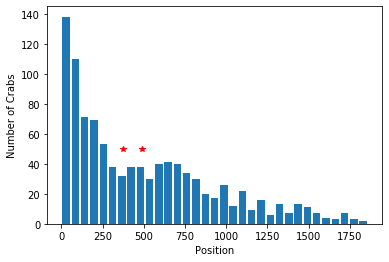

In [26]:
stars = [median(in7), mean(in7)]
plt.hist(in7, bins=33, rwidth=0.8); 
plt.plot(stars, [50, 50], 'r*')
plt.ylabel('Number of Crabs'); plt.xlabel('Position')
stars

# [Day 8](https://adventofcode.com/2021/day/8): Seven Segment Search

- **Input**: Each item in the input consists of 10 *patterns* followed by a "`|`", followed by 4 *output values*.
      
I'll split on the `|` and then extract atoms from both sides:

In [27]:
in8 = parse(8, lambda line: mapt(atoms, line.split('|')))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 200 lines:
────────────────────────────────────────────────────────────────────────────────────────────────────
daegb gadbcf cgefda edcfagb dfg acefbd fdgab fg bdcfa fcgb | cdfgba fgbc dbfac gfadbc
bdfc dcbegf bf egfbcda gebad cfgaed bfe edfgc aegfcb gebdf | fb fb bcdfaeg fcgdeb
cebdgaf bfcd gceab bf bfcea gceafd ecdfa fegdab bfcade fba | dfcb dagfbe fbaged bfa
efabcg aegcdb fgaed fac dgafbc becf eadcgbf aegfc fc cagbe | ecgfa agdef eagfc gdceab
fcdae cdeabf fga gf gabfde cgadb gadebfc cgfe aegcdf afgcd | fbgadce gadefb fag bafegd
gecadbf bgc dacgf gaecbf cbeda dbfg bgdca bg bafcgd gdacef | cdgfa fceabg dgfb dgabc
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 200 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
(('daegb', 'gadbcf',

In [28]:
assert in8[0] == (('daegb', 'gadbcf', 'cgefda', 'edcfagb', 'dfg', 'acefbd', 'fdgab', 'fg', 'bdcfa', 'fcgb'), 
                  ('cdfgba', 'fgbc', 'dbfac', 'gfadbc'))

Each pattern and output value represents a digit on a [7-segment display](https://en.wikipedia.org/wiki/Seven-segment_display), with each letter a–g representing one of the 7 segments that is turned on in that digit. The mapping of letters to segments differs for each input item, but is consistent across all the digits within each item. Here's one mapping:

      aaaa
     b    c
     b    c
      dddd
     e    f
     e    f
      gggg
      
<img src="https://pbs.twimg.com/media/FGHtjKiWYAQGrBX?format=jpg&name=medium" width=400 title="@GaryJGrady">

- **Part 1**: **In the output values, how many times do digits 1, 4, 7, or 8 appear?**

That's the same as asking *how many output values have a length of 2, 4, 3, or 7 segments?*

In [29]:
def lengths2437(data):
    """Count the output values with lengths 2, 4, 3, 7."""
    return quantify(len(value) in (2, 4, 3, 7) 
                    for (lhs, rhs) in data 
                    for value in rhs)

answer(8.1, 493, lambda: lengths2437(in8))

0.000 seconds for correct answer: 493


- **Part 2**: For each entry, determine all of the wire/segment connections and decode the four-digit output values. **What do you get if you add up all of the output values?**

Part 2 is *tricky*. The first output value `'cdfgba'` has 6 segments, so it could be either a 0, 6, or 9. To figure out which one it is I could do some fancy constraint satisfaction. That sounds hard. Or I could exhaustively try all permutations of the ways the 7 letters can map to the 7 segments. That sounds easy!  Here's my plan:
- Make a list of the 7! = 5,040 possible `str.maketrans` translators that permute `'abcdefg'`.
- Decode an entry by trying all translators and keeping the one that maps all of the ten lhs patterns to a valid digit. `decode` then applies the translator to the four rhs values, concatenates them, and  converts the result into an `int`.
  - Note that `get_digit` must *sort* the translated letters to get a key that can be looked up in `segment_map`.
- Finally, sum up the decoding of each entry.

In [30]:
segments7    = 'abcdefg'
segment_map  = {'abcefg': '0', 'cf':     '1', 'acdeg': '2', 'acdfg':   '3', 'bcdf':   '4',
                'abdfg':  '5', 'abdefg': '6', 'acf':   '7', 'abcdefg': '8', 'abcdfg': '9'}

translators = [str.maketrans(segments7, cat(p)) for p in permutations(segments7)]

def get_digit(pattern, translator) -> Optional[Char]:
    """Translate the pattern, and return a digit '0' to '9' if valid."""
    return segment_map.get(cat(sorted(pattern.translate(translator))))

def decode(entry) -> int:
    """Decode an entry's rhs into a 4-digit integer."""
    lhs, rhs = entry
    for t in translators:
        if all(get_digit(pattern, t) for pattern in lhs):
            return int(cat(get_digit(pattern, t) for pattern in rhs))

answer(8.2, 1010460, lambda: sum(map(decode, in8)))

0.599 seconds for correct answer: 1,010,460


# [Day 9](https://adventofcode.com/2021/day/9): Smoke Basin

- **Input:** The input is a *heightmap*: a 2D array of characters '0'–'9' representing the heights on the ocean floor. 

I'll use `parse` to get a tuple of rows (where each row is a tuple of digits), and turn that into a `Grid`.

In [31]:
in9 = Grid(parse(9, digits))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 100 lines:
────────────────────────────────────────────────────────────────────────────────────────────────────
9897656789865467895698765469899988672134598894345689864101378965457932349943210987654789653198789434
8789542499996878954329984398789976561012987789245678953212567892345791998899329899765678969997668912
7678943978987989965998993297649875432129876567956789864487678991056899877778939769886789998766457899
4578999868998996899867894976532986543299876476897899987569899989167898766567898654998898998655345678
2456987657679535679756799988643498657987654345789978899789998878998919954349997543219967987543237889
1234896545568986798645678999754989767898765456998769759899987765789329863238898659301256798793156891
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 100 tuples:
─────────────────────────

- **Part 1**: Find all of the low points on your heightmap. **What is the sum of the risk levels of all low points on your heightmap?**

A low point is a point where all the neighbors are higher. The risk level is 1 more than the height of the low point.

In [32]:
def low_points(grid) -> List[Point]:
    """All low points on grid."""
    return [p for p in grid 
            if all(grid[p] < grid[nbr] for nbr in grid.neighbors(p))]

def total_risk(grid) -> int:
    """Sum of height + 1 for all low points on grid."""
    return sum(grid[p] + 1 for p in low_points(grid))

answer(9.1, 607, lambda: total_risk(in9))

0.015 seconds for correct answer: 607


- **Part 2**: **What do you get if you multiply together the sizes of the three largest basins?**
    
I thought there was an ambiguity in the definition of *basin*: what happens if there is a high point that is not of height 9, but has low points on either side of it? Wouldn't that high point then be part of two basins? The puzzle instructions says *Locations of height 9 do not count as being in any basin, and all other locations will always be part of exactly one basin.* I decided this must mean that the heightmap is carefully arranged so that every basin has only one low point and is surrounded by either edges or height 9 locations.

With that assumption, I can associate each location with its low point using a [flood fill](https://en.wikipedia.org/wiki/Flood_fill) that starts from each low point. I can then get the sizes of the three largest (most common) basins and multiply them together.

In [33]:
def find_basins(grid) -> Dict[Point, Point]:
    """Compute `basins` as a dict of {point: low_point_of_point's_basin} for each point in grid."""
    basins = {} # A dict mapping each non-9 location to its low point.
    def flood_fill(p, low):
        """Spread from p in all directions until hitting a 9;
        mark each point p as being part of the basin with `low` point."""
        if grid[p] < 9 and p not in basins:
            basins[p] = low
            for p2 in grid.neighbors(p):
                flood_fill(p2, low)
    for p in low_points(grid):
        flood_fill(p, low=p)
    return basins

answer(9.2, 900864, lambda: 
       prod(count for low_point, count in 
            Counter(find_basins(in9).values()).most_common(3)))

0.032 seconds for correct answer: 900,864


- **Part 3**: Visualization

I'll make a plot  to display height 9 locations in yellow and height 0 locations in deep purple, with a gradient in between:

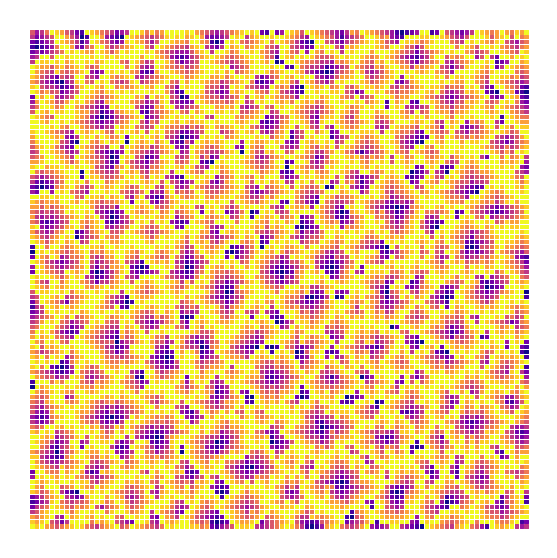

In [34]:
def show_heights(in9, low=None):
    plt.figure(figsize=(10, 10))
    C = [in9[p] for p in in9]
    plt.scatter(*T(in9), marker='s', s=10, c=C, cmap=plt.get_cmap('plasma'))
    if low: plt.plot(*T(low_points(in9)), low, markersize=4)
    plt.axis('square'); plt.axis('off')
    
show_heights(in9)

We can optionally display the low points. Here I'll display them as red diamonds:

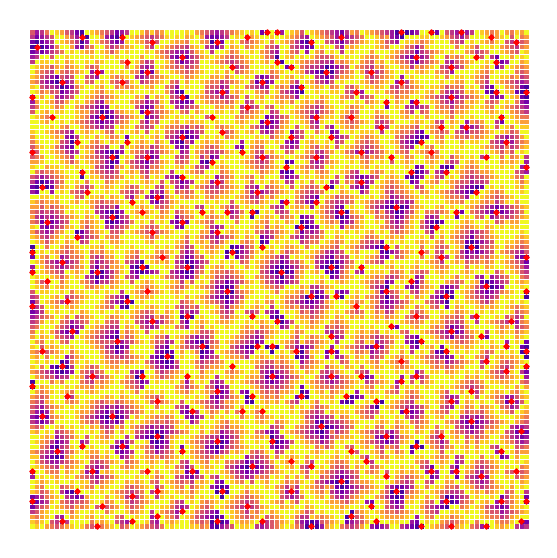

In [35]:
show_heights(in9, low='rD')

Apropos to *Smoke* and *Water,* and to the color scheme of my plot, Gary Grady's drawing for the day references  [Deep Purple](https://www.youtube.com/watch?v=_zO6lWfvM0g):

<img src="https://pbs.twimg.com/media/FGL7YhbX0BAHDDt?format=jpg&name=medium" title="@GaryJGrady" width=400>

# [Day 10](https://adventofcode.com/2021/day/10): Syntax Scoring

- **Input**: Each item in the input is a string of opening and closing brackets: `[({<` and `>})]`.


In [36]:
in10 = parse(10)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 102 lines:
────────────────────────────────────────────────────────────────────────────────────────────────────
[(([{<{(<{{[({{}{}}{[]()})<{{}()}>]}}(([{{{}[]}[[]()]}[<{}[]]{()()}]](({{}{}}{{}()}))){[{({}())[[
<(({[<([{({[{{<>()}}[{<>()}({}{})]]<{<()<>>{[]()}}(((){}>[[][]])>}([{<[]{}>(<>[])}]))<[[[[[][]
(<<(<{{{{<<<[(()<>){()<>}][[()()]]>{<{[]{}}<<>()>>}>{(<{<>}([]{})><(<>())<(){}>>)<(([]{})(()())) ...
[[[[<[{[(<{{{({}<>)((){})}((()())[()()])}}><[([((){})]<[()[]]{{}<>}>)[[{[]<>}][([]{})[{}()]]]]>)<{(<
[<(<[[((<{((<<<>[]>><<<>{}>>){<[{}<>][<>[]]><<<>()>[(){}]>})[<{[{}<>][(){}]}<[[]<>][{}[]])>{([<>[]][
(([[[[<([[{([{<>()}{()<>}][((){})]){[{[]<>}({}<>)][(<><>)[()[]]]}}<{{({}{}){[]{}}}<{<><>}({}{})>}>
...


Ideally, the brackets are balanced, but items might be *corrupted* (an extra closing bracket of the wrong kind appears in the wrong place) or *incomplete* (one or more closing brackets are missing from the end).
  
- **Part 1**: Find the first illegal character in each corrupted line of the navigation subsystem. **What is the total syntax error score for those errors?**

The instructions for Part 1 say *Some of the lines aren't corrupted, just incomplete; you can ignore these lines for now.* That suggests we will not ignore the incomplete lines in Part 2. So I'll define `analyze_syntax` to return a tuple of two values: an error score for use in Part 1, and the missing characters for an incomplete line, which I suspect will be used in Part 2.

In [37]:
error_scores = {')': 3, ']': 57, '}': 1197, '>': 25137}
open_close   = {'(': ')', '[': ']', '{': '}', '<': '>'}

def analyze_syntax(line) -> Tuple[int, str]:
    """A tuple of (error_score, missing_chars) for this line."""
    stack = [''] # A stack of closing characters we are looking for.
    for c in line:
        if c == stack[-1]:     # A correctly matched closing bracket
            stack.pop()
        elif c in open_close:  # A new opening bracket
            stack.append(open_close[c])
        else:                  # An erroneous closing bracket
            return error_scores[c], cat(reversed(stack))
    return 0, cat(reversed(stack))
        
answer(10.1, 367059, lambda: sum(analyze_syntax(line)[0] for line in in10))

0.001 seconds for correct answer: 367,059


- **Part 2**: Find the completion string for each incomplete line, score the completion strings, and sort the scores. **What is the middle score?**

I was right; Part 2 uses the missing characters (now called a *completion string*). To score the completion string, we  treat it as a base-5 number, as shown in `completion_score`.

In [38]:
def completion_score(completion:str) -> int:
    """The completion score for the completion string (the missing characters)."""
    score = completion.translate(str.maketrans(')]}>', '1234'))
    return int(score, base=5)

def median_completion_score(lines) -> int:
    """The median completion score out of all the uncorrupted lines."""
    scores = (completion_score(completion) 
              for e, completion in map(analyze_syntax, lines) 
              if e == 0)
    return median(scores)

answer(10.2, 1_952_146_692, lambda: median_completion_score(in10))

0.001 seconds for correct answer: 1,952,146,692


# [Day 11](https://adventofcode.com/2021/day/11): Dumbo Octopus

- **Input**: The input is a 2D array of characters `0`–`9` representing the energy levels of bioluminescent [dumbo octopuses](https://www.youtube.com/watch?v=eih-VSaS2g0).

In [39]:
in11 = Grid(parse(11, digits), directions8)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 10 lines:
────────────────────────────────────────────────────────────────────────────────────────────────────
1224346384
5621128587
6388426546
1556247756
1451811573
1832388122
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 10 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
(1, 2, 2, 4, 3, 4, 6, 3, 8, 4)
(5, 6, 2, 1, 1, 2, 8, 5, 8, 7)
(6, 3, 8, 8, 4, 2, 6, 5, 4, 6)
(1, 5, 5, 6, 2, 4, 7, 7, 5, 6)
(1, 4, 5, 1, 8, 1, 1, 5, 7, 3)
(1, 8, 3, 2, 3, 8, 8, 1, 2, 2)
...


- **Part 1**: Given the starting energy levels of the dumbo octopuses in your cavern, simulate 100 steps. **How many total flashes are there after 100 steps?**

On each step, each octopus increases by one energy unit; then the ones with an energy level over 9 emit a flash, which makes their neighbors get one more energy unit (potentially causing others to flash); then the flashers reset to zero energy.

In [40]:
def simulate_flashes(grid, steps=100) -> int:
    """Simulate octopus flashes for `steps` steps and return total number of flashes."""
    grid = grid.copy() # Don't mutate the original grid
    flashes = 0
    for step in range(steps):
        flashers = set()
        for p in grid:
            grid[p] += 1
        for p in grid:
            check_flash(grid, p, flashers)
        for p in flashers:
            grid[p] = 0
        flashes += len(flashers)
    return flashes

def check_flash(grid, p, flashers):
    """Check if grid[p] flashes, and if so, recursively spread."""
    if grid[p] > 9 and p not in flashers:
        flashers.add(p)
        for p2 in grid.neighbors(p):
            grid[p2] += 1
            check_flash(grid, p2, flashers)
    
answer(11.1, 1591, lambda: simulate_flashes(in11, 100))

0.008 seconds for correct answer: 1,591


- **Part 2**: If you can calculate the exact moments when the octopuses will all flash simultaneously, you should be able to navigate through the cavern. **What is the first step during which all octopuses flash?**

I feel a bit bad that I have to copy/paste/edit the whole simulation function, changing just the number of steps and the return. But at least I don't have to copy the  `check_flash` function.

In [41]:
def simulate_flashes2(grid) -> int:
    """Simulate octopus flashes and return the first step during which all octopuses flash."""
    grid = grid.copy() # Don't mutate the original grid
    for step in count_from(1):
        flashers = set()
        for p in grid:
            grid[p] += 1
        for p in grid:
            check_flash(grid, p, flashers)
        for p in flashers:
            grid[p] = 0
        if len(flashers) == len(grid):
            return step
        
answer(11.2, 314, lambda: simulate_flashes2(in11))

0.027 seconds for correct answer: 314


<img src="https://pbs.twimg.com/media/FGWQiIuXMAUK_aH?format=jpg&name=medium" width=400 title="@GaryJGrady">

# [Day 12](https://adventofcode.com/2021/day/11): Passage Pathing

- **Input**: Each item in the input is a connection between two caves. Big caves are written in uppercase, small caves in lowercase. `start` and `end` are two special caves with the obvious meaning.

In [42]:
in12 = parse(12, words)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 22 lines:
────────────────────────────────────────────────────────────────────────────────────────────────────
xx-xh
vx-qc
cu-wf
ny-LO
cu-DR
start-xx
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 22 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
('xx', 'xh')
('vx', 'qc')
('cu', 'wf')
('ny', 'LO')
('cu', 'DR')
('start', 'xx')
...


- **Part 1**: **How many paths through this cave system are there that visit small caves at most once?**

My approach is as follows:
- I'll define a path as a list of cave names: `['start', ..., 'end']`.
- I'll construct `neighbors` as a mapping from a cave to the list of caves it connects to.
- I'll do depth-first search, starting from the trivial path `['start']` and returning all possible paths.  

In [43]:
Path = List[str]
    
def search_paths(path, neighbors) -> Iterable[Path]:
    """All paths that start with `path` and lead to 'end' using `neighbors`.
    Small caves can only be visited once."""
    if path[-1] == 'end':
        yield [path]
    else:
        for cave in neighbors[path[-1]]:
            if cave.isupper() or cave not in path:
                yield from search_paths(path + [cave], neighbors)

neighbors = multimap(in12, symmetric=True)
                     
answer(12.1, 4167, lambda: quantify(search_paths(['start'], neighbors)))

0.013 seconds for correct answer: 4,167


- **Part 2**: After reviewing the available paths, you realize you might have time to visit a single small cave twice.  However, the caves named `start` and `end` can only be visited exactly once each. Given these new rules, **how many paths through this cave system are there?**

At first I felt bad that I would again have to copy/paste/edit the code for Part 1. I felt better when I realized that the revised function `search_paths2` would have need to call the original `search_paths`: once a path returns to a small cave for the second time, the remainder of the search should be under the `search_paths` rules, not the `search_paths2` rules.

In [44]:
def search_paths2(path, neighbors) -> Iterable[Path]:
    """Find all paths that start with `path` and lead to 'end' using `neighbors`.
    Small caves can only be visited once, except one of them may be visited twice."""
    if path[-1] == 'end':
        yield [path]
    else:
        for cave in neighbors[path[-1]]:
            if cave.isupper() or cave not in path:
                yield from search_paths2(path + [cave], neighbors)
            elif cave.islower() and cave != 'start':
                yield from search_paths(path + [cave], neighbors)
                            
answer(12.2, 98441, lambda: quantify(search_paths2(['start'], neighbors)))

0.317 seconds for correct answer: 98,441


# [Day 13](https://adventofcode.com/2021/day/13): Transparent Origami

- **Input**: The input is a set of dots, e.g. "`6,10`", followed by an ordered list of fold instructions, e.g. "`fold along y=7`".

My `parse` command is not set up to parse two different sections, so I'll ask `parse` only to parse each line into a tuple of atoms. Then I'll further process the items to get two variables:
- `dots`: a set of `(x, y)` points, such as `(6, 10)`. 
- `folds`: a list of fold instructions such as `('fold', 'along', 'y', 7)`.

In [45]:
in13  = parse(13, atoms)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 789 lines:
────────────────────────────────────────────────────────────────────────────────────────────────────
103,224
624,491
808,688
1076,130
700,26
55,794
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 789 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
(103, 224)
(624, 491)
(808, 688)
(1076, 130)
(700, 26)
(55, 794)
...


In [46]:
atoms('123,456 fold along x=3')

(123, 456, 'fold', 'along', 'x', 3)

In [47]:
dots  = {item for item in in13 if len(item) == 2} 
folds = [item for item in in13 if len(item) > 2]
folds

[('fold', 'along', 'x', 655),
 ('fold', 'along', 'y', 447),
 ('fold', 'along', 'x', 327),
 ('fold', 'along', 'y', 223),
 ('fold', 'along', 'x', 163),
 ('fold', 'along', 'y', 111),
 ('fold', 'along', 'x', 81),
 ('fold', 'along', 'y', 55),
 ('fold', 'along', 'x', 40),
 ('fold', 'along', 'y', 27),
 ('fold', 'along', 'y', 13),
 ('fold', 'along', 'y', 6)]

The idea of this puzzle is that the dots are on transparent paper, and when following the `fold along y=7` instruction, all the dots below the line `y=7` are reflected above the line: they retain the same distance form the `y=7` line, but their `y` value becomes less than `7`. Similarly, for an `x` fold, all the points to the right of the line are reflected to the left. When we finish the folds, a code message will appear (which we can then use to activate the infrared thermal imaging camera system).

- **Part 1**: **How many dots are visible after completing just the first fold instruction on your transparent paper?**

In [48]:
def fold(dots, instruction) -> Set[Point]: 
    """The set of dots that result from following the fold instruction."""
    fold, along, x_or_y, line = instruction
    if x_or_y == 'x':
        return {(line - abs(line - x), y) for (x, y) in dots}
    else:
        return {(x, line - abs(line - y)) for (x, y) in dots}

In [49]:
answer(13.1, 638, lambda: len(fold(dots, folds[0])))

0.000 seconds for correct answer: 638


- **Part 2**: Finish folding the transparent paper according to the instructions. **What code do you use to activate the infrared thermal imaging camera system?**

0.012 seconds for correct answer: CJCKBAPB


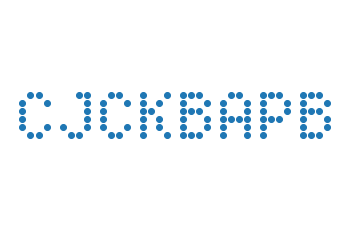

In [50]:
def origami(dots, instructions) -> None:
    """Follow all the instructions and plot the resulting dots."""
    for instruction in instructions:
        dots = fold(dots, instruction)
    plt.scatter(*T(dots), marker='o')
    plt.axis('equal'); plt.axis('off'); plt.gca().invert_yaxis()
    
answer(13.2, "CJCKBAPB", lambda: origami(dots, folds) or "CJCKBAPB")

I kind of cheated here. I didn't want to write an OCR program, so I relied on my own eyes to look at the dots and see the code.

**Note**: My transparent paper was folded 12 times. Is that physically feasible? [Britney Gallivan](https://www.youtube.com/watch?v=AfPDvhKvaa0&) says yes (barely).

# [Day 14](https://adventofcode.com/2021/day/14): Extended Polymerization

- **Input**: The input is a a polymer template (a string of one-letter element names, such as "`NNCB`") followed by a list of pair insertion rules (such as "`CH -> B`", meaning that a `B` should be inserted into the middle of each `CH` pair).

I'll parse each line of the input into a list of `words` (thus ignoring the "`->`" characters); then pick out:
- `polymer`: the sole word on the first line.
- `rules`: the third through last lines, converted into a dict, like `{'CH': 'B', ...}`.

In [51]:
in14    = parse(14, words)
polymer = in14[0][0]
rules   = dict(in14[2:])

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 102 lines:
────────────────────────────────────────────────────────────────────────────────────────────────────
ONSVVHNCFVBHKVPCHCPV

VO -> C
VV -> S
HK -> H
FC -> C
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 102 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
('ONSVVHNCFVBHKVPCHCPV',)
()
('VO', 'C')
('VV', 'S')
('HK', 'H')
('FC', 'C')
...


- **Part 1**: Apply 10 steps of pair insertion to the polymer template and find the most and least common elements in the result. **What do you get if you take the quantity of the most common element and subtract the quantity of the least common element?**

Pair insertion means inserting the element on the right hand side of a rule between each two-element pair. All two-element substrings are considered as pairs, including overlapping ones (my utility function `pairs` handles this). All insertions happen simultaneously during a step.

In [52]:
def pair_insertion(polymer: str, rules, steps: int) -> str:
    """Insert elements into polymer according to rules; repeat `steps` times."""
    for _ in range(steps):
         polymer = cat(pair[0] + rules[pair]
                       for pair in pairs(polymer)) + polymer[-1]
    return polymer

def quantity_difference(polymer) -> int:
    """The count of most common element minus the count of least common element."""
    counts = Counter(polymer).values()
    return max(counts) - min(counts)

def pairs(seq: Sequence) -> List[Sequence]: "All overlapping pairs"; return windows(seq, 2)

assert polymer == 'ONSVVHNCFVBHKVPCHCPV'
assert rules['VO'] == 'C'
assert pairs('NNCB') == ['NN', 'NC', 'CB']
assert pair_insertion('NNCB', rules={'NN': 'C', 'NC': 'B', 'CB': 'H'}, steps=1) == 'NCNBCHB'

answer(14.1, 3259, lambda: quantity_difference(pair_insertion(polymer, rules, 10)))

0.005 seconds for correct answer: 3,259


- **Part 2**: Apply 40 steps of pair insertion to the polymer template and find the most and least common elements in the result. **What do you get if you take the quantity of the most common element and subtract the quantity of the least common element?**

The instructions warn us that the resulting polymer after 40 steps will be *trillions* of elements long. So it isn't feasible to just call `pair_insertion` with steps=40. Instead, I'll employ the same trick as with the lanternfish in Day 6: use a `Counter` of element pairs so that, for example, all the `'NC'` pairs in the polymer are handled simultaneously in one operation, rather than handling each one individually. No matter how many steps we do, there are only 100 distinct element pairs, so iterating over them 40 times should be very fast. 

Here's an example Counter of element pairs:

In [53]:
Counter(pairs('NNCB'))

Counter({'NN': 1, 'NC': 1, 'CB': 1})

What letters does this represent? The complication is that the pairs overlap, so, if we added up the counts for all the times that, say, the letter `'C'` appears in keys of the Counter, we'd get 2; but it should be 1. We can divide the sum by 2 to avoid double counting, but the first and last letters in the polymer are *not* double-counted, so we need to add back 1/2 for each of those letters. Fortunately the first and last letters are invariant under pair insertion, so we can do this adjustment at the end; we don't have to do it for each step.

So all in all there are three representations of a polymer:

In [54]:
Polymer       = str           # e.g. 'NNCB'
PairCounter   = Counter[str]  # e.g. Counter({'NN': 1, 'NC': 1, 'CB': 1})
LetterCounter = Counter[Char] # e.g. Counter({'N': 2, 'C': 1, 'B': 1})

Here's how we convert a PairCounter into a LetterCounter:

In [55]:
def letter_counts(pair_ctr: PairCounter, polymer: Polymer) -> LetterCounter:
    """Return a Counter of the letters in the polymer described by the `pair_ctr`."""
    letters = set(flatten(pair_ctr))
    def letter_count(L) -> int:
        return int(sum(pair_ctr[L+M] + pair_ctr[M+L] for M in letters) / 2
                   + (L == polymer[0]) / 2 + (L == polymer[-1]) / 2)
    return Counter({L: letter_count(L) for L in letters})

In [56]:
letter_counts(Counter(pairs('NNCB')), 'NNCB')

Counter({'B': 1, 'C': 1, 'N': 2})

Let's make sure it works when the first and last letters are the same:

In [57]:
assert (letter_counts(Counter(pairs('NNCB')), 'NNCB')
     == letter_counts(Counter(pairs('NCBN')), 'NCBN'))

Now the new function `pair_insertion_difference` can call on `pair_insertion2` to solve Part 2 (as well as Part 1):

In [58]:
def pair_insertion2(polymer, rules, steps) -> PairCounter:
    """Insert elements into polymer according to rules; repeat `steps` times.
    Return a Counter of element pairs."""
    pair_ctr = Counter(pairs(polymer))
    for _ in range(steps):
        pair_ctr2 = Counter()
        for LM in pair_ctr:
            pair_ctr2[LM[0] + rules[LM]] += pair_ctr[LM]
            pair_ctr2[rules[LM] + LM[1]] += pair_ctr[LM]
        pair_ctr = pair_ctr2
    return pair_ctr

def pair_insertion_difference(polymer, rules, steps):
    """Most common minus least common after `steps` of pair insertion."""
    return quantity_difference(letter_counts(pair_insertion2(polymer, rules, steps), polymer))

assert Counter(pairs('NNCB')) == Counter({'NN': 1, 'NC': 1, 'CB': 1})
assert pair_insertion2('NNCB', rules={'NN': 'C', 'NC': 'B', 'CB': 'H'}, steps=1) == (
       Counter({'NC': 1, 'CN': 1, 'NB': 1, 'BC': 1, 'CH': 1, 'HB': 1}))
assert letter_counts(Counter({'NC': 1, 'CN': 1, 'NB': 1, 'BC': 1, 'CH': 1, 'HB': 1}), 'NNCB') == (
       Counter({'N': 2, 'C': 2, 'B': 2, 'H': 1}))
assert pair_insertion_difference('NNCB', rules={'NN': 'C', 'NC': 'B', 'CB': 'H'}, steps=1) == 1

answer(14.1,          3259, lambda: pair_insertion_difference(polymer, rules, 10))
answer(14.2, 3459174981021, lambda: pair_insertion_difference(polymer, rules, 40))

0.000 seconds for correct answer: 3,259
0.003 seconds for correct answer: 3,459,174,981,021


- **Part 3**: Polymer length?

The instructions didn't ask, but I want to know the length of the polymer that was created after 40 steps:

In [59]:
length = total(pair_insertion2(polymer, rules, 40))
print(f'{length:,d}')

20,890,720,927,744


Almost 21 trillion. Good to know.

# [Day 15](https://adventofcode.com/2021/day/15): Chiton

- **Input**: The input is a square grid of *risk levels* (each one digit, 1–9) for locations in the cave.

In [60]:
in15 = Grid(parse(15, digits))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 100 lines:
────────────────────────────────────────────────────────────────────────────────────────────────────
4249856395422795894919869133487611581179923326874763428673979547991221931142777981153991369468629849
5812974178739823463799939791688998895568796557798392761499941349143539572865883254186633218867928826
3699989976298596286299499129934993241824395574879938998946914116375199242199151918863674914554714898
5682435936794718871685718386458294198391116125679589438794914499278679393779734596558953699438589518
7681197997388219696918569664119968498599547892968929425479817979816979144947916716989874825679487436
9981166198272997899142698141878643123757515999788822988261499197559193945291512682763935126815448215
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 100 tuples:
─────────────────────────

- **Part 1**: You start in the top left position, your destination is the bottom right position, and you cannot move diagonally. **What is the lowest total risk of any path from the top left to the bottom right?** (Don't count the risk level of your starting position.)

Gary Grady's drawing represents the risk involved in finding a path that avoids bumping into the ceiling above or the chitons below.

<img src="https://pbs.twimg.com/media/FGrU-PKXIAQ6sa8?format=jpg&name=medium" width=400 title="@GaryJGrady">

I'll use a search that updates a grid of the `cost` of the best known path from start to each point. The cost for each point is initially infinite (because we don't know any paths), and is updated each time we find a better path to the point. Whenever we find a better path to a point, we see if that will lead to a better path for the neighbors.

In [61]:
def search_grid(grid, start=(0, 0), goal=None) -> int:
    """The total cost of the best path from start to goal (which defaults to bottom right)."""
    goal      = goal or max(grid) # default bottom right
    path_cost = Grid({p: inf for p in grid}) # cost of best known path from start to p
    frontier  = {start} # Set of grid points to consider for possible improvement to path_cost
    while frontier:
        p = frontier.pop()
        new_cost = 0 if p is start else (grid[p] + min(path_cost[b] for b in grid.neighbors(p)))
        if new_cost < path_cost[p]:
            path_cost[p] = new_cost
            frontier.update(grid.neighbors(p))
    return path_cost[goal]

answer(15.1, 687, lambda: search_grid(in15))

0.890 seconds for correct answer: 687


- **Part 2**: The entire cave is actually five times larger in both dimensions. Your original map tile repeats to the right and downward; each time the tile repeats, all of its risk levels are 1 higher than the tile immediately up or left of it. However, risk levels above 9 wrap back around to 1. Using the full map, **what is the lowest total risk of any path from the top left to the bottom right?**

Here's how to define the full map of the cave:

In [77]:
def repeat_grid(grid, repeat=5):
    """Extend the grid to be `repeat` times larger in both directions.
    Values within each repeated block are increased by 1 for each repetition to the right or down,
    but values over 9 wrap around to 1."""
    w, h = grid.width, grid.height 
    return Grid({(x + xr * w, y + yr * h): clock_mod(grid[x, y] + xr + yr, 9)
                 for xr in range(repeat) 
                 for yr in range(repeat)
                 for x, y in grid})

In [78]:
full_map = repeat_grid(in15, 5)
len(full_map), len(in15)

(250000, 10000)

In [85]:
####
%run AdventUtils.ipynb

class ChitonProblem(Problem):
    def actions(self, loc):           return self.grid.neighbors(loc)
    def result(self, loc1, loc2):     return loc2
    def action_cost(self, s1, a, s2): return self.grid[s2]
    def h(self, node): return manhattan_distance(node.state, self.goal) # Never overestimate!
    
astar_search(ChitonProblem(initial=(0, 0), goal=max(full_map), grid=full_map)).path_cost

Node((499, 499))

In [86]:
_.path_cost

2957

With 250,000 points in the full map, `search_grid` takes about 5 minutes (I tried it). That's too slow, so I grabbed the [A* search](https://en.wikipedia.org/wiki/A*_search_algorithm) from my [AoC 2017](https://github.com/norvig/pytudes/blob/main/ipynb/Advent%202017.ipynb) notebook, and supplied it with the proper functions to make a move, compute the cost of a move, and estimate the distance to the goal (the `h_func` or "heuristic function"). A* is guaranteed to find an optimal path if the heuristic function never overestimates the cost from a state to the goal, so I will use the [Manhattan distance](https://en.wikipedia.org/wiki/Taxicab_geometry) as my heuristic–this is the same as assuming that every risk level in the remainder of the path will be 1, the lowest possible.

In [64]:
from heapq import heappop, heappush

def Astar(start, neighbors, h_func, step_cost) -> Tuple[int, list]:
    """Find a (cost, path) tuple for the lowest-cost path from start to a goal.
    A goal is any state `s` such that `h_func(s) == 0`."""
    frontier  = [(h_func(start), start)] # A priority queue, ordered by path_cost(s) + h(s)
    previous  = {start: None}  # start state has no previous state; other states will
    path_cost = {start: 0}     # The cost of the best path to a state.
    path      = lambda s: ([] if (s is None) else path(previous[s]) + [s])
    while frontier:
        (f, s) = heappop(frontier)
        if h_func(s) == 0:
            return path_cost[s], path(s)
        for s2 in neighbors(s):
            g = path_cost[s] + step_cost(s, s2)
            if s2 not in path_cost or g < path_cost[s2]:
                heappush(frontier, (g + h_func(s2), s2))
                path_cost[s2] = g
                previous[s2] = s
                
def Astar_search_grid(grid)  -> Tuple[int, list]:
    """The (risk, path) tuple of the best path from upper-left to bottom-right on grid."""
    goal = max(grid)
    def h_func(s): return abs(sum(goal) - sum(s)) # estimated path cost from s to goal
    def step_cost(_, s2): return grid[s2]         # cost of moving to s2
    return Astar((0, 0), grid.neighbors, h_func, step_cost)

With A* search the run time is greatly improved, down from 5 minutes to 1 second on Part 2 (and a lesser improvement on Part 1).

In [72]:
answer(15.1,  687, lambda: Astar_search_grid(in15)[0])
answer(15.2, 2957, lambda: Astar_search_grid(full_map)[0])

0.036 seconds for correct answer: 687


TypeError: unsupported operand type(s) for +: 'int' and 'tuple'

- **Part 3**: Visualization

Here we see the two paths on the two grids:

In [ ]:
def plot_search_grid(grid, fmt='g-'):
    """PLot the path from start to goal."""
    risk, path = Astar_search_grid(grid)
    plt.plot(*T(path), fmt); plt.gca().invert_yaxis()
    plt.title(f'Path with {len(path) - 1} steps; risk level {risk}')
    
plot_search_grid(in15)

In [ ]:
plot_search_grid(full_map)

# [Day 16](https://adventofcode.com/2021/day/16): Packet Decoder

- **Input**: The input is a single line containing a sequence of hexadecimal digits, a message using the Buoyancy Interchange Transmission System (BITS). 

<img src="https://pbs.twimg.com/media/FGwEUnEWYAE5SVJ?format=jpg&name=medium" width=400 title="@GaryJGrady">

For now I will leave the input as a string of hex digits:

In [ ]:
in16 = parse(16)[0]

- **Part 1:** Decode the structure of your hexadecimal-encoded BITS transmission; **what do you get if you add up the version numbers in all packets?**

The gist of [the instructions](https://adventofcode.com/2021/day/16) is to consider the hexadecimal sequence as a bit string, divide the bit string into bit fields, and construct nested packets based on the values of the fields. Here are basic types for `Bits` (a bit string) and `Packet` (which contains a version number `V`, a type ID `T`, and a `contents` field which can be either a number or a list of packets), along with functions to convert from a hexadecimal string to a bit string, and from there to an int: 

In [ ]:
Bits   = str # a string of '0's and '1's
Packet = namedtuple('Packet', 'V, T, contents') # V is version; T is type ID

def bits_from_hex(hex) -> Bits: 
    """Convert a hexadecimal string into a bit string, making sure each hex digit is 4 bits."""
    # I could have used just `bin(int(hex, 16))`, except that wouldn't left-zero-pad when needed.
    return cat(f'{int(x, 16):04b}' for x in hex)

def int2(bits: Bits) -> int: 
    """Convert a bit string into an int."""
    return int(bits, 2)

To parse the bit string into packets, I will have four functions that start with the word `parse_` and return a tuple of two values: the object parsed (either an int or a packet) and the remaining bits that were not parsed.

In [ ]:
def parse_int(L, bits) -> Tuple[int, Bits]:
    """Parse an integer from the first L bits; return the int and the remaining bits."""
    return int2(bits[:L]), bits[L:]

def parse_packet(bits) -> Tuple[Packet, Bits]:
    """Parse a packet; return it and the remaining bits."""
    V, T, bits = int2(bits[0:3]), int2(bits[3:6]), bits[6:]
    parser = parse_literal_packet if T == 4 else parse_operator_packet
    return parser(V, T, bits)
        
def parse_literal_packet(V, T, bits) -> Tuple[Packet, Bits]:
    """Build a packet with a literal value; return it and the remaining bits."""
    literal = ''
    while True:
        prefix, group, bits = bits[0], bits[1:5], bits[5:]
        literal += group
        if prefix == '0':
            return Packet(V, T, int2(literal)), bits

def parse_operator_packet(V, T, bits) -> Tuple[Packet, Bits]:
    """Build a packet with subpackets; return it and the remaining bits."""
    I, bits = parse_int(1, bits)
    L, bits = parse_int((15, 11)[I], bits)
    subpackets = []   
    if I == 0: # Parse L bits of subpackets
        subpacket_bits, bits = bits[:L], bits[L:]
        while subpacket_bits:
            packet, subpacket_bits = parse_packet(subpacket_bits)
            subpackets.append(packet)
    else: # Parse L subpackets
        for p in range(L):
            packet, bits = parse_packet(bits)
            subpackets.append(packet)        
    return Packet(V, T, subpackets), bits

Now we're ready to solve the puzzle by summing up the version numbers, `V`, of all the packets:

In [ ]:
def nested_packets(packet) -> Iterator[Packet]: 
    """The packet and all its subpackets."""
    yield packet
    if packet.T != 4: 
        for p in packet.contents:
            yield from nested_packets(p)

packet16, _ = parse_packet(bits_from_hex(in16))

answer(16.1, 989, lambda: sum(p.V for p in nested_packets(packet16)))

This was more code than previous days! Here are some assertions I used to make sure I was on the right track:

In [ ]:
assert (bits_from_hex('D2FE28') == '110100101111111000101000')

assert (int2(bits_from_hex('D2FE28')) == 13827624)

assert (bits_from_hex('38006F45291200') 
        == '00111000000000000110111101000101001010010001001000000000')

assert (parse_int(4, '011100111') == (7, '00111'))

assert (parse_packet('110100101111111000101000') 
        == parse_literal_packet(6, 4, '101111111000101000')
        == (Packet(V=6, T=4, contents=2021), '000'))

assert (parse_packet('00111000000000000110111101000101001010010001001000000000')
        == (Packet(V=1, T=6, contents=[Packet(V=6, T=4, contents=10), 
                                       Packet(V=2, T=4, contents=20)]),
            '0000000'))

assert (parse_packet('11101110000000001101010000001100100000100011000001100000')
        == (Packet(V=7, T=3, contents=[Packet(V=2, T=4, contents=1), 
                                       Packet(V=4, T=4, contents=2), 
                                       Packet(V=1, T=4, contents=3)]),
            '00000'))

- **Part 2**: **What do you get if you evaluate the expression represented by your hexadecimal-encoded BITS transmission?**

The evaluation rules are that a literal packet evaluates to the number that is its contents, and an operator packet applies an operator determined by the type id (in the `packet.T` field) to the list of values formed by evaluating the subpackets. I put the operators into the `packet_ops` dict.

In [ ]:
def eval_packet(packet) -> int:
    """Evaluate a packet according to the operator rules."""
    if packet.T == 4:
        return packet.contents
    else:
        vals = [eval_packet(p) for p in packet.contents]
        return packet_ops[packet.T](vals)
    
packet_ops = {0: sum, 1: prod, 2: min, 3: max, 
              5: lambda v: int(v[0] > v[1]), 
              6: lambda v: int(v[0] < v[1]), 
              7: lambda v: int(v[0] == v[1])}

answer(16.2, 7936430475134, lambda: eval_packet(packet16))

# [Day 17](https://adventofcode.com/2021/day/17): Trick Shot

- **Input**: The input is a short string describing the x and y coordinates of a target area.

Because the input is so short, I will copy it literally here instead of reading it from a file. I use `ints` to extract the four integers.

In [ ]:
in17 = ints("target area: x=257..286, y=-101..-57")
in17

The puzzle involves firing a probe and checking if it hits the target area. The probe starts from an initial position with an initial velocity, and traverses a path according to the physics described in the instructions: each time step position is incremented by velocity, but gravity causes it to gain a -1 in `y` velocity; drag causes it lose 1 in `x` velocity.

<img src="https://pbs.twimg.com/media/FG1Ws7vWYAMTsPf?format=jpg&name=medium" width=400 title="@GaryJGrady">

- **Part 1**: Find the initial velocity that causes the probe to reach the highest `y` position and still eventually be within the target area after some time step. **What is the highest `y` position it reaches on this trajectory?**

First I'll define two classes:
- `Target` keeps track of the `Xs` and `Ys` that define the target area.
- `Probe` keeps track of:
  - The `x` and `y` position coordinates
  - The `vx` and `vy` velocity values
  - A boolean `hit` which is True if the probe hit the target at some point in its path
  - The `highest` height it ever reached.

In [ ]:
class Target:
    """The target has a range of Xs and Ys coordinates."""
    def __init__(self, x0, x1, y0, y1): self.Xs, self.Ys = cover(x0, x1), cover(y0, y1) 
        
Probe = namedtuple('Probe', 'x, y, vx, vy, hit, highest', 
                   defaults=(0, 0, 0,  0,  False, 0))

target17 = Target(*in17)

The function `probe_step` simulates the physics of the world for one time step: incrementing the probe's position by its velocity vector,  changing the `xv` velocity due to drag and the `yv` velocity due to gravity, and tracking the `hit` and `highest` values.

The function `probe_steps` simulates for multiple time steps; until the probe has passed the target. 

In [ ]:
def probe_steps(probe, target=target17, do=ignore) -> Probe:
    """Simulate the probe until it passes the target.
    You can optionally `do` something to the probe on each time step."""
    maxx, miny = max(target.Xs), min(target.Ys)
    do(probe)
    while probe.x <= maxx and probe.y >= miny:
        probe = probe_step(probe, target)
        do(probe)
    return probe

def probe_step(probe, target) -> Probe:
    """Simulate the physics of the probe for one time step."""
    x, y, vx, vy, hit, highest = probe
    return Probe(x=x + vx, y=y + vy, 
                 vx=sign(vx) * (abs(vx) - 1), vy=vy - 1,
                 hit=hit or (x in target.Xs and y in target.Ys),
                 highest=max(highest, y + vy))

In [ ]:
def probe_steps(probe, target=target17, do=ignore) -> Probe:
    """Simulate the probe until it passes the target.
    You can optionally `do` something to the probe on each time step."""
    maxx, miny = max(target.Xs), min(target.Ys)
    do(probe)
    while probe.x <= maxx and probe.y >= miny:
        x, y, vx, vy, hit, highest = probe
        probe = Probe(x=x + vx, y=y + vy, 
                      vx=sign(vx) * (abs(vx) - 1), vy=vy - 1,
                      hit=hit or (x in target.Xs and y in target.Ys),
                      highest=max(highest, y + vy))
        do(probe)
    return probe

For example:

In [ ]:
probe_steps(Probe(vx=24, vy=5))

By experimentation, I found that:
- Any `vx<23` will never reach the target (regardless of `vy`).
- A `vx=23` value means that the probe will have an `x` velocity of zero when it is inside the width of the target. 
- Any `vx>23` will eventually pass beyond the target width (and might or might not hit the target along the way). 
- This is because 23 is the only value that leads to a sequence of decreasing `vx` values adding up to an `x` position that is within the x=257..286 target area: 23 + 22 + 21 + ... + 2 + 1 = 276. (As with Day 7, we're dealing with triangular numbers.)  Here's the demonstration:

In [ ]:
{vx: [sum(range(vx, 0, -1)), sum(range(vx, 0, -1)) in target17.Xs]
 for vx in [22, 23, 24]}

Specifying `do=print` is useful for experimentation:

In [ ]:
probe_steps(Probe(vx=23, vy=7), do=print)

Once I found the critical `vx=23` value, I figured I could simply vary the `vy` values to find the highest height:

In [ ]:
def highest_height(vxs, vys) -> int:
    """The highest height reached by a probe that hits the target, among all vx and vy values."""
    probes = [probe_steps(Probe(vx=vx, vy=vy)) for vx in vxs for vy in vys]
    return max(probe.highest for probe in probes if probe.hit)
    
answer(17.1, 5050, lambda: highest_height(vxs=[23], vys=range(150)))

I recognize 5,050 as the 100th triangular number (just as Gauss did, as [legend has it](https://www.americanscientist.org/article/gausss-day-of-reckoning)), and of course the highest height of any trajectory must be a triangular number, because `vy` decreases by one each step.

- **Part 2**: **How many distinct initial velocity values cause the probe to be within the target area after some time step?**
    
I can try a bunch of `vx` and `vy` values. For `vx`, start at the critical 23 value and go up to the maximum of the target area (meaning that the probe hits the right edge of the target area on the first time step). For `vy`, start with a negative value that would hit the bottom of the target area on the first time step, and go up to 100. (Anything more than `vy=100` would end up passing through the target without touching it: the probe's `y` value would be above the target on one step and below it on the next.)

In [ ]:
def probe_hits(velocities: Iterable[Point]) -> int:
    """How many of these velocities cause the probe to hit the target?"""
    return quantify(probe_steps(Probe(vx=vx, vy=vy)).hit 
                    for vx, vy in velocities)

answer(17.2, 2223, lambda:
       probe_hits(cross_product(range(23, max(target17.Xs) + 1), 
                                range(min(target17.Ys), 101))))

- **Part 3**: Visualization

I'd like to understand things a bit better with some visualization. The function `plot_probes` plots the target as a black box and plots the paths of various probes with different initial velocities in different colors:

In [ ]:
def plot_probes(velocities: List[Point], target=target17) -> None:
    """Plot the target as a black box and the paths of probes with colored lines."""
    plt.plot(*box(target.Xs, target.Ys), 'k-', linewidth=4)
    for (vx, vy) in velocities:
        path = []
        probe_steps(Probe(vx=vx, vy=vy), do=path.append)
        plt.plot([p.x for p in path], [p.y for p in path], '.:', label=f'({vx}, {vy})')
    plt.legend()
    
def box(Xs, Ys) -> Tuple[List[int], List[int]]:
    """A tuple of (x_coords, y_coords) to draw a box around the (x, y) points."""
    x1, x2, y1, y2 = min(Xs), max(Xs), min(Ys), max(Ys)
    return [x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1]

Below are four paths: two  that hit the target, and two that miss:

In [ ]:
 plot_probes([(24, 5), (32, 0), (34, -5), (36, -10)])

Below we see that `vx=22` is doomed to stall before it reaches the target area; `vx=23` is the critical value that stalls and falls into the target area; and `vx=24` shoots beyond the target area before stalling.

In [ ]:
 plot_probes([(22, 12), (23, 10), (24, 8)])

Below is `vx=23`  paired with three different `vy` velocities:

In [ ]:
 plot_probes([(23, 16), (23, 11), (23, 7)])

When `vx < vy` the probe's path begins by bending up (e.g. for `(23, 32)`); when `vx = vy` the path is a straight line  (with ever-slowing speed); and when `vx > vy` the path bends down (e.g. for `(23, 8)`). But all paths eventually stall and fall due to drag.

In [ ]:
 plot_probes([(23, 32), (23, 23), (23, 8)])

Below, initial velocity `(23, 100)`, yields the high point of 5050 before stalling and falling into the target:

In [ ]:
 plot_probes([(23, 100)])

Note the y-axis on this plot is ten times more than the previous plot. That's why the target box looks so squished and the path slope looks shallow. If we equalize the two axes, we can see how steep the slope is (and why this day is titled "Trick Shot"):

In [ ]:
 plot_probes([(23, 100)]); plt.axis('square');

I can now see a more efficient way to deal with this problem:
  - The movement in  `x` and  `y` are independent, so we can treat them separately:
      - For each `vx`, determine in which time step(s) a probe could intersect `target.Xs`.
      - For each `vy`, determine in which time step(s) a probe could intersect `target.Ys`.
  - Now if a time step has 10 `vx` and 12 `vy` intersects, then that's 120 hits. 
  - The number of simulations we have to do is the sum of the lengths of `vxs` and `vys`, not their product.
  - This technique could have cut the number of simulations from about 50,000 to about 500. 
  - But 50,000 is a small number and the code runs in well under a second, so we don't need a re-implementation

# [Day 18](https://adventofcode.com/2021/day/18): Snailfish

- **Input**: The input is the math homework for some snailfish: each item is a *snailfish number*. A snailfish number is either a regular number (a non-negative integer) or a bracketed pair of two snailfish numbers separated by a comma. 

For now I'll leave each line of the input as a string:

In [ ]:
in18 = parse(18)

- **Part 1**: Add up all of the snailfish numbers  in the order they appear. **What is the magnitude of the final sum?**

From [the Day 18 instructions](https://adventofcode.com/2021/day/18), I determined that I will need to do the following:
- **Add** two snailfish numbers.
- **Reduce** a snailfish number to simplified form.
- **Split** a regular number that is inside a snailfish number.
- **Explode** a deeply-nested pair inside a snailfish number.
- Compute the **magnitude** of a snailfish number.

What representation of snailfish numbers can best handle these operations? I considered three candidates:
1. **String**: a string in the same format as the input file. I could manipulate them with regular expressions. <br>But as my friend Jamie Zawinski [famously said](http://regex.info/blog/2006-09-15/247), "now I have two problems."
2. **Tree**: a nested tree of pairs, each a Python list of two elements. The input string can be directly converted into this form with `functools.literal_eval`. But **explode** needs to find the "previous" and "next" numbers–that would require walking up and down the tree, or maintaining next/previous pointers. Sounds complicated.
3. **Flat list**: A flat linear list of regular numbers, with annotations giving the nesting level of each number. 

I decided to go with the flat list. The split and explode operations should be easy. Finding the previous and next number is trivial. However, for the  **magnitude** calculation I think I will want to convert to the nested tree form. 

I will define these three data types:
- `Snum`: a *snailfish number*. Implemented as a mutable flat list of `Num` objects. 
- `Num`: a *regular number*. A mutable object with two fields: `.n`, the number itself, and `.level`, the nesting level. 
- `Tree`: a *snailfish number* represented by either an `int` or a list of two `Tree` elements.

For example, the snailfish number `[[7,[8,9]],10]` would be represented as:

     Snum([Num(7, level=2), Num(8, level=3), Num(9, level=3), Num(10, level=1)])

Here are the three type definitions:

In [ ]:
class Snum(list): 
    """An Snum is a list of Num components."""

@dataclass()
class Num:
    """A "regular number" within an Snum, annotated with its nesting level."""
    n: int
    level: int
    
Tree = Union[int, List['Tree']] # An int like `1` or a list like `[2,3]` or `[1,[2,3]]`.

Below are the four main operations. (I wanted to be sure I got the instructions right, so I copied them mostly verbatim into the docstrings.) Note that `split` and `explode` mutate their argument, and return `True` if they changed the argument. That simplifies the control flow in `snum_reduce`.

In [ ]:
def snum_add(left: Snum, right: Snum) -> Snum:
    """To add two snailfish numbers, form a pair from the left and right 
    parameters of the addition operator. Snailfish numbers must always be reduced."""
    snum = Snum(Num(x.n, x.level + 1) for x in left + right)
    return snum_reduce(snum)

def snum_reduce(snum) -> Snum:
    """Mutate snum until it is in reduced form.
    To reduce a snailfish number, you must repeatedly do the first action 
    that applies to the snailfish number: (1) explode (2) split."""
    while explode(snum) or split(snum):
        continue
    return snum

def split(snum) -> bool:
    """If any regular number is 10 or greater, the leftmost such regular number splits.
    Mutate the snum and return True if there was a split; False if not.
    To split a regular number, replace it with a pair; the left element of the pair 
    should be the regular number divided by two and rounded down, while the right element 
    of the pair should be the regular number divided by two and rounded up. 
    For example, 10 becomes [5,5], 11 becomes [5,6], 12 becomes [6,6], and so on."""
    i = first(i for i, s in enumerate(snum) if s.n >= 10)
    if i is None: 
        return False
    else: # The number to split is snum[i]
        level = snum[i].level
        L, R  = snum[i].n // 2, (snum[i].n + 1) // 2
        snum[i] = Num(L, level + 1)
        snum.insert(i + 1, Num(R, level + 1))
        return True
    
def explode(snum) -> bool:
    """If any pair is nested inside four pairs, the leftmost such pair explodes.
    Mutate the snum and return True if there was an explode; False if not.
    To explode a pair, the pair's left value is added to the first regular number 
    to the left of the exploding pair (if any), and the pair's right value is added 
    to the first regular number to the right of the exploding pair (if any). 
    Exploding pairs will always consist of two regular numbers. 
    Then, the entire exploding pair is replaced with the regular number 0."""
    i = first(i for i, s in enumerate(snum) if s.level > 4)
    if i is None:
        return False
    else: # the exploding pair is: [snum[i], snum[i + 1]]
        if i - 1 >= 0: # The pair's left value is added to the number to the left
            snum[i - 1].n += snum[i].n
        if i + 2 < len(snum): # The pair's right value is added to the number to the right
            snum[i + 2].n += snum[i + 1].n
        snum[i:i+2] = [Num(0, snum[i].level - 1)] # Replace the pair with a `0`
        return True

Here are routines to convert from a string into an `Snum`, and from an `Snum` to a `Tree`:

In [ ]:
def snum_from_str(snum_str: str) -> Snum:
    """Convert a string representing a snailfish number into an Snum (a list of Nums)."""
    level = 0
    result = []
    # Break the string into pieces, e.g. '[[7,8],10]' => '[[', '7', ',', '8', '],', '10', ']'
    for piece in re.split(r'(\d+)', snum_str):
        if piece[0] in '0123456789':
            result.append(Num(int(piece), level))
        else:
            level += piece.count('[') - piece.count(']')
    return result
    
def tree_from_snum(snum) -> Tree:
    """Convert an Snum into a nested tree of two-element pairs."""
    q = deque(snum)
    def grab(level):
        return (q.popleft().n if q[0].level == level 
                else [grab(level + 1), grab(level + 1)])
    return grab(level=0)

Finally, the **magnitude**. I can't see an easy way to directly compute it on an `Snum`, so I'll convert to a `Tree` first.

In [ ]:
def snum_magnitude(snum) -> int: 
    """The magnitude of a pair is 3 times the magnitude of its left element 
    plus 2 times the magnitude of its right element. 
    The magnitude of a regular number is just that number."""
    def mag(tree): return tree if is_int(tree) else 3 * mag(tree[0]) + 2 * mag(tree[1])
    return mag(tree_from_snum(snum))

Now the puzzle solution:

In [ ]:
homework = mapt(snum_from_str, in18)

answer(18.1, 4457, lambda: snum_magnitude(functools.reduce(snum_add, homework)))

Great! It worked the first time! That justifies my choice of a flat list as the easiest representation for `Snum`.

- **Part 2**: **What is the largest magnitude of any sum of two different snailfish numbers from the homework assignment?**

My implementation is fast enough that I can try all possibilities:


In [ ]:
answer(18.2, 4784, lambda:
       max(snum_magnitude(snum_add(L, R)) 
           for L in homework 
           for R in homework if L != R))

# [Day 19](https://adventofcode.com/2021/day/19): Beacon Scanner 

- **Input**: The input is a sequence of *scanner reports*, where each report is a list of the relative three-dimensional distances to beacons that the scanner can see.

I'll `parse` the input into sections, then split each section into lines, ignoring the first line with the scanner number, and parsing the remaining lines of each section into a sequence of  3D points, and collecting them into an object of type `Scanner`, which I define as a subclass of `set`:

In [ ]:
class Scanner(set):
    """A Scanner is a set of points representing the beacons that the scanner can see."""
    
in19 = parse(19, lambda section: Scanner(mapt(ints, section.splitlines()[1:])), '\n\n')

- **Part 1**: Unfortunately, while each scanner can report the positions of all detected beacons relative to itself, the scanners do not know their own position. You'll need to determine the positions of the beacons and scanners yourself. Unfortunately, there's a second problem: the scanners also don't know their rotation or facing direction. Assemble the full map of beacons. **How many beacons are there?**

The first thing I want to do is figure out how important efficiency is. `parse` said there are only 36 scanners. On average, how many beacons does each scanner see?

In [ ]:
mean(map(len, in19))

Not too bad; I was worried there could be thousands of beacons. There are:
  - *S* = 36 scanners
  - *B* = 26 mean beacons per scanner
  - 24 orientations of each scanner (per the instructions)

At first I was confused: I thought that if there are 3! permutations of  `(x, y, z)`, and 2<sup>3</sup> ways to have or not have a minus sign on each dimension, then there should be 6 × 8 = 48 different orientations. But the instructions say 24. I decided that if you don't permute (x, y, z), and just negate the x component, that's equivalent to a mirror image, which we don't want. You can get a mirroring with a minus sign on any of the three components, or by reversing the order of the components (e.g. `(x, y, z)` going to `(z, y, x)`) but not if you just rotate the order (e.g. `(x, y, z)` going to `(z, x, y)`). Two mirrorings reverse things back to normal, so the 24 valid orientations are those with a rotation and an even number of minus signs, or a reversal in the ordering and an odd number of minus signs. 

Since I'm going to be applying these transforms often, I will compile them into functions. I'll do that by constructing strings and then applying `eval` to each string.

In [ ]:
Point3D = Tuple[int, int, int] # A 3D Point, like (1, 2, -3).

def transformers(signs, orders) -> List[Callable]: 
    """Strings that define 3D transformations of signs and variable ordering."""
    return [transformer(f'({a}{x}, {b}{y}, {c}{z})')
            for a,b,c in signs for x,y,z in orders]

def transformer(transform: str) -> Callable:
    """Turn this transformer string into a callable function."""
    fn = eval('lambda points: {' + transform + ' for x, y, z in points}')
    fn.__name__ = 'Orient' + transform
    return fn
              

orient_fns  = (transformers(['   ', '-- ', ' --', '- -'], ['xyz', 'yzx', 'zxy']) + 
               transformers(['---', '-  ', ' - ', '  -'], ['zyx', 'xzy', 'yxz']))

Here's a test applying the 24 orientation functions to a tiny set `B` of 2 beacons:

In [ ]:
assert len(orient_fns) == 24

B = {(1, 2, 3), (-4, -5, -6)}

assert [(fn.__name__, fn(B)) for fn in orient_fns] == [
 ('Orient( x,  y,  z)', {(-4, -5, -6), (1, 2, 3)}),
 ('Orient( y,  z,  x)', {(-5, -6, -4), (2, 3, 1)}),
 ('Orient( z,  x,  y)', {(-6, -4, -5), (3, 1, 2)}),
 ('Orient(-x, -y,  z)', {(-1, -2, 3), (4, 5, -6)}),
 ('Orient(-y, -z,  x)', {(-2, -3, 1), (5, 6, -4)}),
 ('Orient(-z, -x,  y)', {(-3, -1, 2), (6, 4, -5)}),
 ('Orient( x, -y, -z)', {(-4, 5, 6), (1, -2, -3)}),
 ('Orient( y, -z, -x)', {(-5, 6, 4), (2, -3, -1)}),
 ('Orient( z, -x, -y)', {(-6, 4, 5), (3, -1, -2)}),
 ('Orient(-x,  y, -z)', {(-1, 2, -3), (4, -5, 6)}),
 ('Orient(-y,  z, -x)', {(-2, 3, -1), (5, -6, 4)}),
 ('Orient(-z,  x, -y)', {(-3, 1, -2), (6, -4, 5)}),
 ('Orient(-z, -y, -x)', {(-3, -2, -1), (6, 5, 4)}),
 ('Orient(-x, -z, -y)', {(-1, -3, -2), (4, 6, 5)}),
 ('Orient(-y, -x, -z)', {(-2, -1, -3), (5, 4, 6)}),
 ('Orient(-z,  y,  x)', {(-3, 2, 1), (6, -5, -4)}),
 ('Orient(-x,  z,  y)', {(-1, 3, 2), (4, -6, -5)}),
 ('Orient(-y,  x,  z)', {(-2, 1, 3), (5, -4, -6)}),
 ('Orient( z, -y,  x)', {(-6, 5, -4), (3, -2, 1)}),
 ('Orient( x, -z,  y)', {(-4, 6, -5), (1, -3, 2)}),
 ('Orient( y, -x,  z)', {(-5, 4, -6), (2, -1, 3)}),
 ('Orient( z,  y, -x)', {(-6, -5, 4), (3, 2, -1)}),
 ('Orient( x,  z, -y)', {(-4, -6, 5), (1, 3, -2)}),
 ('Orient( y,  x, -z)', {(-5, -4, 6), (2, 1, -3)})
]

That looks good. The next step is to find pairs of scanners that can see the same beacons. The instructions say that every scanner has at least one other scanner with which it shares at least 12 detected beacons. How can I find the matches, and do it efficiently? Some options:
1. For every pair of scanners, I could apply every orientation transformation to *one of them, then try every alignment of a point in that transformation to a point in the other scanner, then count the number of matching points with that alignment, and see if the count exceeds 12.  Total complexity: 24 *S*<sup>2</sup> *B*<sup>3</sup> operations.
2. For every scanner, compute the distance between each pair of points. (This set of distances will be invariant under orientation transformations, so we've saved a factor of 24.) Now compare distance sets between pairs of scanners and see which ones exceed 12×11/2 = 66 matches. Total complexity: *S* *B*<sup>2</sup> + *S*<sup>2</sup>*B*<sup>2</sup> operations. (Note: we actually store squared distances, not distances, to avoid possible round-off error and to save the runtime cost of computing square roots.)

Option 2 it is!  The algorithm will be:

     keep track of lists of `aligned` and `unaligned` scanners
     add the first unaligned scanner to the list of aligned scanners
     whenever an aligned scanner is added:
         check to see if each unaligned can scanner can be aligned with it
     while there are unaligned scanners:
         pop off one unaligned scanner S
         find an unaligned scanner R that c
         
**NOTE: I started below, but did not complete the solution.**

In [ ]:
def align_scanners(scanners, k=12) -> Set[Point3D]:
    """Align all scanners"""
    for S in scanners:
        S.distances2 = {distance2(p, p2) for p, p2 in combinations(S, 2)}
    aligned, unaligned = [], scanners
    return align_scanner(unaligned.pop(), aligned, unaligned, k)

def add_aligned_scanner(S, aligned, unaligned, k) -> List[Scanner]:
    """Add S to aligned; recursively align other scanners with S; return aligned."""
    aligned.append(S)
    unaligned.remove(S)
    for R in unaligned.copy():
        if R not in aligned and len(S.distances2 & R.distances2) >= k * (k - 1) // 2:
            add_aligned_scanner(align(R, S), aligned, unaligned, k)
                        
def distance2(p: Point3D, p2: Point3D) -> int:
    """Squared distance between two 3D points."""
    return (p[0]-p2[0]) ** 2 + (p[1]-p2[1]) ** 2 + (p[2]-p2[2]) ** 2

def align(R: Scanner, S: Scanner, k=12) -> Scanner:
    "Orient and offset Scanner R to align with Scanner S; return the new version of R."
    for orient in orient_fns:
        R2 = orient(R)
        for offset in offsets(S1, A):
            S2 = Scanner(add3D(s, offset) for s in S)
            if len(S2 & A) >= k:
                S2.distances2 = S.distances2
                return S2
    raise ValueError("Can't align scanners")

Now that we can find two scanners that are alignable, we have to actually align them:

In [ ]:
def offsets(S, A) -> Iterator[Point3D]:
    """All offsets that would make some point in S align with some point in A."""
    return (minus3D(a, s) for s in S for a in A)

def minus3D(A: Point3D, B: Point3D) -> Point3D:
    return (A[0] - B[0], A[1] - B[1], A[2] - B[2])

def add3D(A: Point3D, B: Point3D) -> Point3D:
    return (A[0] + B[0], A[1] + B[1], A[2] + B[2])

# [Day 20](https://adventofcode.com/2021/day/20): Trench Map

- **Input**: The input is in two sections: first, a 512-character string describing an image enhancement algorithm; second a grid of pixels depicting an image.

I'll parse the file into two sections, calling the first segment `rules` and the second `image`. Then I'll convert the `image` to a `Grid`.

In [ ]:
rules, image = in20 = parse(20, sep='\n\n')
image = Grid(image.splitlines())

- **Part 1**: Start with the original input image and apply the image enhancement algorithm twice, being careful to account for the infinite size of the images. **How many pixels are lit in the resulting image?**

**It is a truth universally acknowledged,** that an Eric Wastl in possession of an Advent of Code, must be in want of a [Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) puzzle. This is it! The "image enhancement algorithm" defines how pixels turn on and off. I've done Life before, e.g. [here](Life.ipynb) and [here](https://adventofcode.com/2020/day/17). This should be easy! 

**Unfortunately**, there's a twist: spontaneous generation. I was *shocked* to find  `rules[0] == '#'` in my enhancement rules. (That wasn't the case for the example in the instructions.)  This means that every dark pixel in the middle of empty dark space will spontaneously become  light pixel in the next generation, resulting in an infinite number of light pixels.

<img src="https://pbs.twimg.com/media/FHE69USXsAI8pg2?format=jpg&name=medium" width=400 title="@GaryJGrady">

**Fortunately**, `rules[255] == '.'`, which means that almost all of the infinite number of light pixels will become dark again in the following generation. It's as if we convert between a positive image and a negative on each enhancement.

Therefore, my strategy will be:
- In generation 0 (and every even generation) we will have a finite set of *light* pixels. Use them to generate a finite set of *dark* pixels.
- In generation 1 (and every odd generation), we will have a finite set of *dark* pixels. Use them to generate a finite set of *light* pixels.
- Generating a dark pixel requires at least one neighboring light pixel, and generating a light pixel requires at least one neighboring dark pixel. So to know what pixels to consider as candidates for the next generation, I can use the current set of pixels and their neighbors. So I won't need the `Grid`, just the `set` of light pixels in it. I'll create a subclass of `set` called `Pixels` which is just like `set` but keeps track of the `.color` of pixels, light or dark.

In [ ]:
light  = '#'
dark   = '.'

class Pixels(set):
    """A set of pixel Points; self.color says if they are light or dark."""
    def __init__(self, pixels, color=light):
        self.update(pixels)
        self.color = color

def enhance(pixels, n=1, rules=rules) -> Pixels:
    """The set of pixels that result from applying enhancement rules `n` times."""
    for generation in range(n):
        candidate_pixels = set(flatten(map(neighborhood, pixels)))
        negative = dark if pixels.color == light else light
        pixels = Pixels((p for p in candidate_pixels
                         if rules[pixel_sum(p, pixels)] == negative),
                        negative)
    return pixels

def pixel_sum(point, pixels):
    """The sum of the 9 pixels in the neighborhood. If `pixels.color == light`,
    add up the neighborhood points that are in `pixels`; if not,
    add up the neighborhood points that are not in `pixels`."""
    return sum((256 >> i) * ((p in pixels) == (pixels.color == light))
               for i, p in enumerate(neighborhood(point)))

def neighborhood(point) -> List[Point]:
    "The nine points surrounding `point` (including `point` itself)."
    (x, y) = point
    return [(x-1, y-1), (x, y-1), (x+1, y-1), 
            (x-1, y),   (x, y),   (x+1, y), 
            (x-1, y+1), (x, y+1), (x+1, y+1)]

pixels = Pixels(p for p in image if image[p] == light) # pixels in my image

In [ ]:
answer(20.1, 5437, lambda: len(enhance(pixels, 2)))

- **Part 2**: Start again with the original input image and apply the image enhancement algorithm 50 times. **How many pixels are lit in the resulting image?**


In [ ]:
answer(20.2, 19340, lambda: len(enhance(pixels, 50)))

# [Day 21](https://adventofcode.com/2021/day/21): Dirac Dice


We're playing a two-player game with the following rules: On each turn a player rolls the die three times, adds them up, and moves forward that many spaces on a circular board consisting of spaces marked 1 to 10; space 10 wraps around to 1. The player increases their score by the space they land on; first player to 1000 points wins.

- **Input**: My input is the text "`Player 1 starting position: 5 \ Player 2 starting position: 6`".

I won't bother to read this from the file; I'll just translate it into this statement:

In [ ]:
start_positions = (5, 6)

- **Part 1**: Play a practice game using the deterministic 100-sided die. The moment either player wins, **what do you get if you multiply the score of the losing player by the number of times the die was rolled during the game?**

I'll implement a deterministic die as an iterator: `cycle(range(1, 101)` returns 1 first, then 2, etc. up to 100, then goes back to 1. My function `play_dice` keeps track of positions and scores for both players and returns the product of the number of dice rolled times the loser's score.

In [ ]:
def play_dice(die: Iterator, positions=start_positions, target=1000) -> int:
    """Play the dice game with the given die until someone scores `target`.
    Return total_number_of_dice_rolled * loser_score."""
    positions = list(positions)
    scores = [0, 0]
    for turn in count_from(1):
        player = (turn - 1) % 2
        roll = next(die) + next(die) + next(die)
        positions[player] = clock_mod(positions[player] + roll, 10)
        scores[player] += positions[player]
        if scores[player] >= 1000:
            return 3 * turn * min(scores)
            
answer(21.1, 1002474, lambda: play_dice(die=cycle(range(1, 101))))

- **Part 2**: This time we play with a quantum die. Using your given starting positions, determine every possible outcome. **Find the player that wins in more universes; in how many universes does that player win?**

A three-sided quantum die  splits the universe into three copies every time it is rolled: one where the outcome of the roll was 1, one where it was 2, and one where it was 3. We need to track all these universes. But for this game a player only needs 21 points to win; not 1000.

The instructions warn us that there will be *trillions* of universes, so I'm concerned about efficiency. I must avoid enumerating all possibile universes one by one. I should either use a `Counter` of game states (as with the lanternfish in Day 6), or use dynamic programming (which I can implement with caching on a recursive function). 

I decided to go with the recursive function. I'll define `play_dice2(pos1, pos2, score1, score2, target)` as a function that returns a tuple of (number of wins, number of losses) for player 1, given the positions of the two players, the scores of the two players, and the target winning score, under the assumption that it is player 1's turn to roll. Note that in the recursive call to `play_dice2` it is player 2's turn, so the arguments and return values are swapped. I did it this way, rather than have two-element sequences for the positions and scores, because this way cuts in half the number of different game states I have to track.

In [ ]:
dice3_rolls = mapt(sum, cross_product([1, 2, 3], repeat=3))

@cache
def play_dice2(pos1, pos2, score1, score2, target) -> Tuple[int, int]:
    """The number of (winning universes, losing universes) for player 1,
    given that player 1 is at `pos1` with `score1` points (and likewise for player 2)."""
    wins, losses = 0, 0
    if score2 >= target: # Player 2 has won; record a loss for player 1
        losses += 1 
    else:                # Player 1 takes their turn; then count wins and loses for the game
        for roll in dice3_rolls:
            newpos1 = clock_mod(pos1 + roll, 10)
            roll_losses, roll_wins = play_dice2(pos2, newpos1, score2, score1 + newpos1, target)
            wins += roll_wins
            losses += roll_losses
    return wins, losses

answer(21.2, 919758187195363, lambda: max(play_dice2(*start_positions, 0, 0, 21)))

I had some ideas to make this more efficient (such as iterating over a Counter of `dice3_rolls`) but it is fast enough as is.

How many different game states did we explore?

In [ ]:
play_dice2.cache_info()

Only 24,841 distinct game states.

# [Day 22](https://adventofcode.com/2021/day/22): Reactor Reboot

- **Input**: The input is a list of steps for rebooting the ship's reactor, such as "`on x=10..12,y=10..12,z=10..12`".

I'll parse each line into a tuple consisting of either `"on"` or `"off"` followed by three ranges (using `cover` because the high end is inclusive):

In [ ]:
Step = Tuple[str, range, range, range]

def parse_reboot_step(line: str) -> Step:
    """Parse a line into a reboot step description."""
    x1, x2, y1, y2, z1, z2 = ints(line)
    return (line.split()[0], cover(x1, x2), cover(y1, y2), cover(z1, z2))

in22 = parse(22, parse_reboot_step)

The intent of each step is to turn on or off all the individual cubes in the reactor core that are within the *cuboid* specified by the three ragnes. So a 3x3x3 cuboid specifies 27 cubes.

- **Part 1**: Execute the reboot steps. Afterward, considering only cubes in the region x=-50..50,y=-50..50,z=-50..50, **how many cubes are on?**

[I have a bad feeling about this](https://www.youtube.com/watch?v=S74rvpc6W60). The example in the instructions has a small enough number of cubes that we can just brute-force enumerate them. But I suspect in Part 2 there will be trillions of cubes and brute force willl no longer work. [It's a trap!](https://www.youtube.com/watch?v=4F4qzPbcFiA) 

Still, I'll go ahead and do the brute-force enumeration for Part 1: for each step that describes a cuboid that falls within the region, form the set of all the cubes in the cuboid, and add or subtract them from a running set of `cubes`.  Each cube is denoted by a single `(x, y, z)` triple of integer coordinates. Note that it is guaranteed that every step describes a cuboid that is either entirely within or entirely outside the position range -50..50 on all three dimensions, so I only need to check one of the three dimensions.

In [ ]:
def count_cubes(steps, region=cover(-50, 50)) -> int:
    """Follow `steps` to turn on or off those cubes that are in `region`, and count 'on' cubes."""
    cubes = set()
    for (flip, xs, ys, zs) in steps:
        if xs.start < region.start or xs.stop > region.stop:
            pass # step is outside the region
        elif flip == "on":
            cubes |= set(cross_product(xs, ys, zs))
        else:
            cubes -= set(cross_product(xs, ys, zs))
    return len(cubes)  

answer(22.1, 533863, lambda: count_cubes(in22))

- **Part 2**: Starting again with all cubes off, execute all reboot steps. Afterward, considering all cubes, **how many cubes are on?**

Well, I was *wrong*. There aren't going to be *trillions* of cubes; there are going to be *quadrillions*. 

I will need a way to handle steps without explicitly enumerating the cubes. If no cuboids intersected, it would be easy: for each "on" cuboid, multiply the lengths of the three sides to get the volume, then add up the volumes. But the intersections complicate things.

I'll start with some [exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis)  to answer some questions.

**Question**: how many of the steps are "on"?

In [ ]:
Counter(step[0] for step in in22)

**Answer**: There are 420 steps, of which about 3/4 are "on" steps.

**Question**: How big are the cuboids? 

In [ ]:
volumes = [len(x) * len(y) * len(z) / 1e12 for (on, x, y, z) in in22]
plt.hist(volumes, rwidth=0.8, bins=36, 
         label=f'cuboid volume in trillions (mean {mean(volumes):.1f})')
plt.legend();

**Answer**: An average cuboid consists of 7.6 trillion cubes. A big one has 35 trillion, but most are under 10 trillion. 

**Question**: How long are the sides of the cuboids?

In [ ]:
lengths = [[len(step[i]) for step in in22] for i in (1,2,3)]
plt.hist(lengths, bins=25, label=list('xyz'))
plt.legend();

**Answer**: The histogram above breaks out the lengths of the sides of the cuboids by x, y, and z dimensions. It looks like a roughly normal distribution (although noisy) in each dimension with mean around 20,000, except that we can see a spike just above length 0 for the 20 small cuboids that are used in Part 1 (plus a few other cuboids that happen to have small ranges in one of the `x` or `z` dimensions, but not `y`).

**Question**: Can I visualize the actual cuboids?

In [ ]:
plt.figure(figsize=(6, 6)) # Make it square
for (on, xs, ys, zs) in in22:
    plt.plot(*box(xs, ys), '-')

**Answer**: The plot above gives a 2D projection into the XY plane. (You could also project to XZ or YZ planes, but I don't think that would be very different. To do 3D you'd need animation. A 3D VR headset would help.) 

We can also look more closely at a sample of every tenth cuboid, this time in the YZ plane:

In [ ]:
plt.figure(figsize=(6, 6))
for (on, xs, ys, zs) in in22[::10]:
    plt.plot(*box(ys, zs), '-')

**Question**: What's a good strategy for counting cubes?

**Answer**: You can see in the plots above that when two rectangles intersect, they can leave non-rectangular pieces (and in 3 dimensions, non-cuboid pieces). That's the difficulty. The key is to break these pieces up into smaller pieces that are all cuboids.  The algorithm will be:

1. Find all the **split points** in the first dimension–values of `x` that start or end a cuboid. Create a list of **bins**, one covering the range between each pair of adjacent split points.

2. Assign each step to the bin(s) it overlaps. For example (in 2 dimensions), suppose that step 1 is a 7x4 "on" step and step 2 is a 6x4 "off" step, and that they span the  locations shown below left. When we split on `x`  we  get the three bins shown below right (all 1s in the left bin, all 2s in the right bin, and both 1 and 2 in the middle bin):

         1111111                   1111  111
         1111111                   1111  111
         1111222222                1111  222  222
         1111222222                1111  222  222
             222222                      222  222
             222222                      222  222


3. Recurse if there are more dimensions to split on. In the example, we need to split on `y`.  The two outside bins aren't split (because they only have one step), but the middle bin is split into 3 bins. Notice that each bin is a rectangle (and in 3 dimensions, each bin would be a cuboid). 

               111
         1111  111
         1111
         1111  222  222
         1111  222  222
                    222
               222  222
               222
               

4. For each bin that is "on", multiply their side lengths to get their volume, and add up the volumes to get the total number of "on" cubes. In the example, the "on" bins (with step 1) are one 4x4 cuboid and one 3x2 cuboid, giving a total of 22 cubes.

For the real input data, I would probably end up with a million or so bins. Adding up the volumes of a million bins will be faster than enumerating a quadrillion cubes.
             
Below is the implementation. For the `Bin` data type, I'll have a field for the dimension we are splitting on; one for the range of values covered in that dimension by the bin; and one for a list of  `kids`: At first it holds a list of all the steps that at least partially overlap the bin, but then (for the `x` and `y` dimensions but not `z`) that list of steps will be replaced by a list of bins.

In [ ]:
@dataclass
class Bin:
    dim:   int   # 1, 2, or 3 for x, y, or z dimension
    range: range # locations that are covered by this bin, on the given dimension
    kids:  Union[List[Step], List['Bin']] # Steps that overlap this bin (may be converted to bins)

def bins_from_steps(steps, dims=(1, 2, 3)) -> List[Bin]:
    """Convert the steps to a list of bins."""
    # (1) Find all the split points in the first dimension. Create a list of bins.
    dim, *more_dims = dims
    splits = sorted(set(flatten((step[dim].start, step[dim].stop) for step in steps)))
    bins   = [Bin(dim, range(*pair), []) for pair in pairs(splits)]
    # (2) Assign each step to the bin(s) it overlaps.
    for bin in bins:
        bin.kids = [step for step in steps if overlaps(bin.range, step[dim])]
    # (3) Recurse if there are more dimensions
    if more_dims:
        for bin in bins:
            bin.kids = bins_from_steps(bin.kids, more_dims)
    return bins

def overlaps(A: range, B: range) -> bool:
    """Do these ranges overlap?"""
    return (B.start <= A.start < B.stop) or (A.start <= B.start < A.stop)

Here is the example, showing the three bins at the `x` level, and five at the `y` level:

In [ ]:
steps2 = [('on',  range(0, 7), range(0, 4)), 
          ('off', range(4, 9), range(2, 6))]

assert (bins_from_steps(steps2, (1, 2)) == 
        [Bin(1, range(0, 4), 
             [Bin(2, range(0, 4), [('on', range(0, 7), range(0, 4))])]), 
         Bin(1, range(4, 7), 
             [Bin(2, range(0, 2), [('on', range(0, 7), range(0, 4))]), 
              Bin(2, range(2, 4), [('on', range(0, 7), range(0, 4)), 
                                   ('off', range(4, 9), range(2, 6))]), 
              Bin(2, range(4, 6), [('off', range(4, 9), range(2, 6))])]), 
         Bin(1, range(7, 9), 
             [Bin(2, range(2, 6), [('off', range(4, 9), range(2, 6))])])])

The test passes! The only thing that remains is to count up the number of cubes in the "on" cuboids. I'll define `count_cubes2` so that it can handle Part 1 as well as Part 2:

In [ ]:
def count_cubes2(steps, region=None) -> int:
    """Follow `steps` to turn on or off cubes, and count 'on' cubes."""
    if region:
        steps = [s for s in steps if s[1].start >= region.start and s[1].stop <= region.stop]
    return sum(count_cubes_in_bin(bin) for bin in bins_from_steps(steps))

def count_cubes_in_bin(bin) -> int:
    """How many "on" cubes are in this bin? Recurse down to `dim == 3`, keeping track of 
    the lengths of all three sides, and return the product for bins that are "on"."""
    N = len(bin.range)
    if bin.dim < 3:
        return N * sum(map(count_cubes_in_bin, bin.kids))
    elif bin.kids and (bin.kids[-1][0] == 'on'):
        return N
    else:
        return 0

Let's go ahead and solve the complete puzzle without any more tests:

In [ ]:
answer(22.1, 533863, lambda: count_cubes2(in22, region=cover(-50, 50)))
answer(22.2, 1261885414840992, lambda: count_cubes2(in22))

We got the right answers. Part 1 runs 50 times faster; Part 2 takes over 5 seconds. One idea to make it faster: I  compare every step to every bin. This could probably be speeded up with a binary search. I chose not to do that because binary searches are notorious for off-by-one errors; doubly so when searching over ranges of numbers, not a single number.

# [Day 23](https://adventofcode.com/2021/day/23): Amphipod

**NOTE: I started below, but did not complete the solution.** This should be an easy application of A-star search to a grid problem, but I didn't find the time to complete it, because of holiday season obligations.

In [ ]:
class HGrid(Grid):
    """A hashable grid; can be used as a key in dicts."""
    def __hash__(self): return hash(tuple(sorted(self.items())))
    
in23 = HGrid(parse(23))

In [ ]:
amphipods  = A, B, C, D = 'ABCD'        # The four kinds of creature
amphi_costs= {A:1, B:10, C:100, D:1000} # Cost of each step
goal_cols  = {A: 3, B: 5, C: 7, D: 9}   # Column each Amphipod type aspires to
hall_row   = 1                          # Row where the hall spaces are
side_rows  = {2, 3}                     # Rows every Amphipod aspires to
side_rooms = {(goal_cols[L], r) for r in side_rows for L in amphipods}     # All the spaces off of the hallway
hallway    = {(c, hall_row) for c in range(1, 12)}                         # Hallway spaces
hall_stops = {(c, r) for (c, r) in hallway if c not in goal_cols.values()} # Hallway spaces where you're allowed to stop

@dataclass
class Move:
    start: Point
    end: Point
    what: Char
        
def extract_state(grid, kinds):
    """The parts of the grid of a certain kind."""
    return {loc: grid[loc] for loc in grid if grid[loc] in kinds}

def clear(loc, dest, state):
    """Is the path from `loc` to `dest` clear of Amphipods in state?"""
    Δx = sign(X_(dest) - X_(loc))
    Δy = sign(Y_(dest) - Y_(loc))
    return all((X_(loc) + i * Δx, Y_(loc) + i * Δy) not in state
               for i in range(1, distance(loc, dest) + 1))

def amphi_moves(state) -> Iterable[Move]:
    """All the moves that can be made from a state."""
    for loc in state:
        # If you're in a side room and you have a clear path to the doorway ...
        if loc in side_rooms and clear(loc, (X_(loc), hall_row), state):
            # ... then you can move to any hall stop that you have a clear path to
            for hall in hall_stops:
                if clear((X_(loc), hall_row), hall, state):
                    yield Move(loc, hall, state[loc])
        # If you're in the hallway and you have a clear path to your doorway ... 
        goal_col = goal_cols[state[loc]]
        if loc in hallway and clear(loc, (goal_col, hall_row), state):
            # ... then you can move to the top empty space in your side room if no foreign occupants
            occupants = {L for (x, y), L in state.items() if x == goal_col}
            if not occupants or occupants == {state[loc]}:
                top_row = max(y for y in side_rows if (goal_col, y) not in state)
                yield Move(loc, (goal_col, top_row), state[loc])
    


In [ ]:
Δc = 0
Δc

In [ ]:
from time import perf_counter as pfc
from heapq import heappop, heappush


def read_puzzle(filename):
  with open(filename) as f:
    return ''.join([c for c in f.read() if c in 'ABCD.'])


def can_leave_room(puzzle, room_pos):
  for a in room_pos:
    if puzzle[a] == '.': continue
    return a


def blocked(a,b,puzzle):
  step = 1 if a<b else -1
  for pos in range(a+step, b+step, step):
    if puzzle[pos] != '.': return True    


def get_possible_parc_pos(a,parc,puzzle):
  for b in [pos for pos in parc if puzzle[pos] == '.']:
    if blocked(a,b,puzzle): continue
    yield b


def move(a,b,puzzle):
  p = list(puzzle)
  p[a], p[b] = p[b], p[a]
  return ''.join(p)


def can_enter_room(a,b,amphi,puzzle,room_pos):
  for pos in room_pos:
    if puzzle[pos] == '.': best_pos = pos
    elif puzzle[pos] != amphi: return False
  if not blocked(a,b,puzzle): return best_pos


def possible_moves(puzzle, parc, stepout, target):
  for a in [pos for pos in parc if puzzle[pos] != '.']:
    amphi = puzzle[a]
    b=can_enter_room(a, stepout[amphi], amphi, puzzle, target[amphi])
    if (b):
      yield a,b
  for room in 'ABCD':
    a=can_leave_room(puzzle, target[room])
    if not (a): continue
    for b in get_possible_parc_pos(stepout[room], parc, puzzle):
      yield a,b


def solve(puzzle):
  energy = dict(A=1, B=10, C=100, D=1000)
  parc= [0,1,3,5,7,9,10]
  stepout = dict(A=2, B=4, C=6, D=8)
  target = {r: range(ord(r)-54,len(puzzle),4) for r in 'ABCD'}
  targetI = {v:key for key,val in target.items() for v in val}

  solution = '.'*11+'ABCD'*((len(puzzle)-11)//4)
  heap, seen = [(0,puzzle)], {puzzle:0}
  while heap:
    cost, state = heappop(heap)
    if state == solution: return cost
    for a,b in possible_moves(state, parc, stepout, target):
      p,r = (a,b) if a < b else (b,a)
      distance = abs(stepout[targetI[r]] - p) + (r-7)//4
      new_cost = cost + distance * energy[state[a]]
      moved = move(a,b,state)
      if seen.get(moved,999999) <= new_cost: continue
      seen[moved] = new_cost
      heappush(heap,(new_cost, moved))
  

  

print(solve(read_puzzle("AOC/2021/input23.txt")))
#print(solve(read_puzzle("Tag_23_b.txt")))


In [ ]:
extract_from_grid(goal23, '.')

In [ ]:
amphi_goal

# [Day 24](https://adventofcode.com/2021/day/24): Arithmetic Logic Unit

- **Input**: The input is a sequence of assembly language instructions for the submarine's ALU.

I'll parse each line into a tuple of atoms:

In [ ]:
in24 = program = parse(24, atoms)

Here are the instructions for how to interpret each instruction:

- `inp a` - Read an input value and write it to variable a.
- `add a b` - Add the value of a to the value of b, then store the result in variable a.
- `mul a b` - Multiply the value of a by the value of b, then store the result in variable a.
- `div a b` - Divide the value of a by the value of b, truncate the result to an integer, then store the result in variable a. (Here, "truncate" means to round the value toward zero.)
- `mod a b` - Divide the value of a by the value of b, then store the remainder in variable a. (This is also called the modulo operation.)
- `eql a b` - If the value of a and b are equal, then store the value 1 in variable a. Otherwise, store the value 0 in variable a.

Note that `b` can be either a variable name or an integer constant. Note there is no branch instruction. Inputs read by the `inp` instruction are one-digit numbers. There are 14 `inp` instructions, and if you feed the program a valid 14-digit model number, it will leave 0 in variable `z`.

- **Part 1**: To enable as many submarine features as possible, find the largest valid fourteen-digit model number that contains no 0 digits. **What is the largest model number accepted by MONAD?**

Obviously we can't try all 14-digit numbers, so we'll have to somehow understand what the program is doing to find the right model number. But first let's implement the ALU:

In [ ]:
def alu(program, inputstr) -> Dict[str, int]:
    """Run a program with an input string on the submarine's ALU,
    and return a dict of the program variables (and {'error': op} if appropriate)."""
    inputs = iter(inputstr)
    M = dict(w=0, x=0, y=0, z=0) # Memory
    for op, a, *rest in program:
        b = M.get(rest[0], rest[0]) if rest else None
        if op == 'inp': 
            M[a] = int(next(inputs))
        elif op == 'add': 
            M[a] += b
        elif op == 'mul': 
            M[a] *= b
        elif op == 'div': 
            if b == 0: return {'error': 1, **M}
            M[a] //= b
        elif op == 'mod': 
            if M[a] < 0 or b <= 0: return {'error': 2, **M}
            M[a] %= b
        elif op == 'eql': 
            M[a] = int(M[a] == b)
    return M
        

We can run a program:

In [ ]:
alu(program, '12345678901234')

Let's figure out where the input instructions are:

In [ ]:
{i for i, ins in enumerate(program) if ins[0] == 'inp'}

They're every 18 instructions. Let's look at the program divided into 18-instruction segments:

In [ ]:
def instr(i) -> str: return f'{i:3d}: ' + ' '.join(map(str, program[i])).ljust(9)

for i in range(18):
    print("| ".join(instr(i + 18 * j) for j in range(6)))

Each column is similar, but there are different constants for instructions 4–5 and 15 in each column:

In [ ]:
{i: {instr(i + 18 * j)[5:].strip() for j in range(6)} for i in range(18)}

Let's try every possible digit as the first input, and see what the program computes right up to the point where it is ready to read the second digit:

In [ ]:
{d: alu(in24[:18], d) for d in '0123456789'}

It looks like after processing one digit, *d*, we have:
- w = *d*
- x = 1
- y = z = *d* + 6
    
Let's try it for every two-digit input:

In [ ]:
def inputs(n) -> List[str]: return [str(i).zfill(n) for i in range(10 ** n)]

{i: alu(in24[:36], i) for i in inputs(2)}

So, *w* is the last digit of the input; *x* is always 1; *y* is 6 more than the last digit, and *z* is 162 + 26 times the first digit plus the last digit.

**I was unable to figure out was going on.**

In [ ]:
{i: alu(in24, i) for i in ['10000000000000', 
                           '12345678901234', 
                           '11111111111111',
                           '23456789876543']}

# [Day 25](): Sea Cucumber

- **Input**: The input is a map of east-moving (`>`) and south-moving (`v`) sea cucumbers.


In [ ]:
in25 = Grid(parse(25))

- **Part 1**: Every step, the sea cucumbers in the east-facing herd attempt to move forward one location, then the sea cucumbers in the south-facing herd attempt to move forward one location. When a herd moves forward, every sea cucumber in the herd first simultaneously considers whether there is a sea cucumber in the adjacent location it's facing (even another sea cucumber facing the same direction), and then every sea cucumber facing an empty location simultaneously moves into that location. **Find somewhere safe to land your submarine. What is the first step on which no sea cucumbers move?**

Since the herd moves simultaneously, I won't directly update the grid; rather I will keep track of the herd of east-goers (as a set of points) and the herd of south-goers, and update each set on each step. (After extracting the two herds from the grid, it is only used for its width and height).

In [ ]:
def move_cukes(grid) -> int:
    """Move sea cucumbers according to rules until they stop moving.
    Return the number of steps it took."""
    east  = {p for p in grid if grid[p] == '>'}
    south = {p for p in grid if grid[p] == 'v'}
    for step in count_from(1):
        new_east  = set(move_herd(east,  south,    1, 0, grid.width, grid.height))
        new_south = set(move_herd(south, new_east, 0, 1, grid.width, grid.height))
        if east == new_east and south == new_south:
            return step
        east, south = new_east, new_south

def move_herd(herd: Set[Point], other_herd, dx, dy, width, height) -> Iterator[Point]:
    """The new positions of the herd; they each move by (dx, dy) if that space is open."""
    for (x, y) in herd:
        p2 = ((x + dx) % width, (y + dy) % height)
        yield p2 if (p2 not in herd and p2 not in other_herd) else (x, y)
        
answer(25.1, 424, lambda: move_cukes(in25))

Unfortunately for me, Part 2 of Day 25 just asked if you had solved all the other puzzles. I hadn't.

# Submarine Captain's Log, Supplemental

Here is a summary of the results:

In [ ]:
answers

I didn't complete days **19, 23, and 24**. 19 is a bit tedious, but shouldn't be conceptually hard. 23 is easy; just need to apply standard graph-search ideas. For 24, I have no idea. I need to reverse engineer the program to understand what it is actually doing. 

We see that only the following puzzles took more than a second of run time:
- **15.2 Chiton**: just over 1 second for search through the 500x500 grid 
- **20.2 Trench Map**: 4 seconds for enhancing the 100x100 grid for 50 generations
- **22.2 Reactor reboot**: 5 seconds for counting a quadrillion cubes